O que o Hygor pediu sobre agrupar empresa de ano X com ano Y:

A botar:
- análise de cada cluster
- como valores numéricos variam por cluster (gráfico)

Teste: Ver quais big techs e empresas do setor automotivo são agrupadas com a Tesla e delas tirar a nacionalidade.

Primeiro definir períodos de interesse com base no gráfico.

Colocar indicadores como parâmetros na análise

[*********************100%***********************]  1 of 1 completed


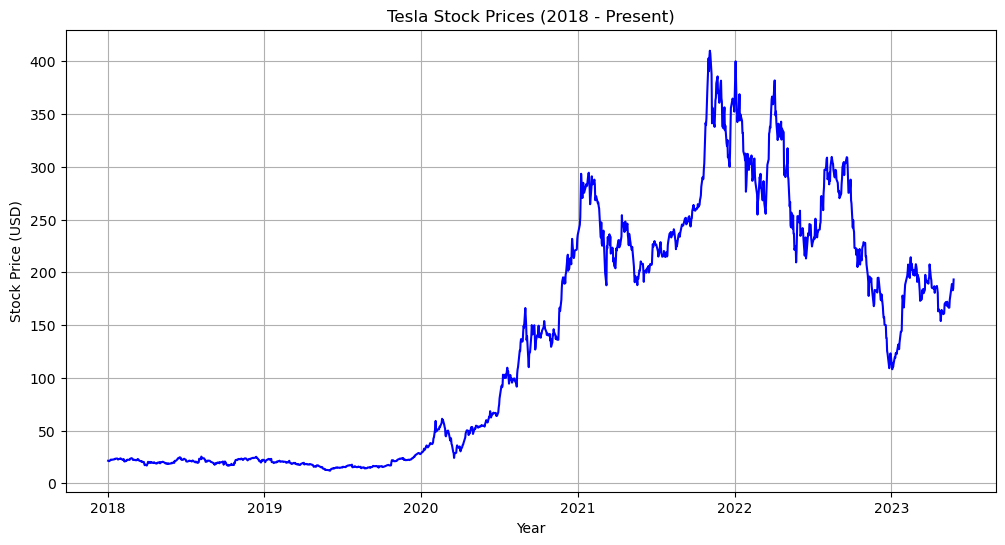

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol and the timeframe
ticker_symbol = "TSLA"
start_date = "2018-01-01"
end_date = "2023-05-28"  # Use the current date as the end date

# Fetch the stock data using yfinance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extract the "Close" prices from the stock data
stock_prices = data["Close"]

# Plotting the stock prices
plt.figure(figsize=(12, 6))
plt.plot(stock_prices.index, stock_prices, color="b")
plt.title("Tesla Stock Prices (2018 - Present)")
plt.xlabel("Year")
plt.ylabel("Stock Price (USD)")
plt.grid(True)
plt.show()


periodos de interesse: 2020-2021, 2021-2022,2022-2023

In [1]:
import csv
import pandas as pd

tickers = []  # Lista para armazenar os tickers

with open('tickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Pula o cabeçalho do arquivo CSV
    for row in csv_reader:
        ticker = row[0]  # Acessa a primeira coluna (índice 0)
        tickers.append(ticker)

Estrutura do projeto:
- ver o gráfico de ações da tesla ao longo do tempo. pegar os períodos em que ela mais aumentou ou decaiu. estabelecer como o período
a ser observado, depois fazer clusterizações nesse tempo. pra ver com o que a tesla foi agrupada.


Segmentar minha análise por períodos específicos de tempo já que o que eu tenho na minha tabela são as médias dos valores.

[combinando dataframe]

In [4]:
# Define os períodos de tempo
periods = [("2016-01-01", "2017-01-01"),("2017-01-01", "2018-01-01"),("2018-01-01", "2019-01-01"),("2019-01-01", "2020-01-01"),("2020-01-01", "2021-01-01"), ("2021-01-01", "2022-01-01"), ("2022-01-01", "2023-01-01")]

# Cria os dataframes para cada período
dfs = []
for i, period in enumerate(periods):
    start_date, end_date = period
    df_list = []
    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start_date, end=end_date)
            data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
            data['Ticker'] = ticker + str(i+1)
            df_list.append(data)
        except KeyError:
            print(f"Skipping ticker {ticker} - data not found for period {i+1}.")
    
    # Concatena os dataframes do período atual
    df_period = pd.concat(df_list)
    dfs.append(df_period)

# Verifica se dados foram encontrados para algum ticker em cada período
for i, df_period in enumerate(dfs):
    if len(df_period) == 0:
        print(f"No valid data found for any tickers in period {i+1}. Exiting.")
        exit()

# Concatena os dataframes dos períodos em um único dataframe
df_combined = pd.concat(dfs)

# Calcula os retornos médios e a volatilidade para cada ação em cada período
returns_combined = df_combined.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns_combined = returns_combined.pct_change()
mean_returns_combined = daily_returns_combined.mean()
volatility_combined = daily_returns_combined.std()

# Cria um novo dataframe para armazenar as características combinadas
X_combined = pd.DataFrame(index=tickers)

# Calcula a volatilidade e os retornos médios para cada período e ticker
for i, period in enumerate(periods):
    start_date, end_date = period
    returns_period = dfs[i].pivot_table(values='Close', index='Date', columns='Ticker')
    daily_returns_period = returns_period.pct_change()
    mean_returns_period = daily_returns_period.mean()
    volatility_period = daily_returns_period.std()
    X_combined[f'Mean Returns {i+1}'] = mean_returns_period
    X_combined[f'Volatility {i+1}'] = volatility_period

# Exibe os dataframes resultantes
print("Dataframe para cada período:")
for i, df_period in enumerate(dfs):
    print(f"Período {i+1}:")
    print(df_period.head())

print("\nDataframe combinado:")
print(df_combined.head())

print("\nCaracterísticas combinadas:")
print(X_combined.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAC: Data doesn't exist for startDate = 1451624400, endDate = 1483246800
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AADI: Data doesn't exist for startDate = 1451624400, endDate = 1483246800
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAMC: Data doesn't exist for startDate = 1451624400, endDate = 1483246800
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- A

Período 0?

In [36]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = []
with open('tickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2018-01-01", end="2023-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
X0 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
X0['Close STD'] = df.groupby('Ticker')['Close'].std()
X0['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
X0['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X0['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
X0['Close Max'] = df.groupby('Ticker')['Close'].max()
X0['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
X0['Close Min'] = df.groupby('Ticker')['Close'].min()
X0['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
X0['Close Median'] = df.groupby('Ticker')['Close'].median()
X0['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
X0['Close Range'] = X0['Close Max'] - X0['Close Min']
X0['Volume Range'] = X0['Volume Max'] - X0['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
X0['Mean Returns'] = mean_returns
X0['Volatility'] = volatility

X0['Volume Mean Returns'] = mean_returns2
X0['Volume Volatility'] = volatility2

# Calcule outras estatísticas descritivas
X0['Close Std Dev'] = df.groupby('Ticker')['Close'].std()
X0['Volume Std Dev'] = df.groupby('Ticker')['Volume'].std()

X0['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
X0['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()



X0['Close Change'] = df.groupby('Ticker')['Close'].apply(lambda x: np.log(x / x.shift()))
X0['Volume Change'] = df.groupby('Ticker')['Volume'].apply(lambda x: np.log(x / x.shift()))

X0['Close Change Mean'] = X0.groupby('Ticker')['Close Change'].mean()
X0['Close Change Std Dev'] = X0.groupby('Ticker')['Close Change'].std()
X0['Volume Change Mean'] = X0.groupby('Ticker')['Volume Change'].mean()
X0['Volume Change Std Dev'] = X0.groupby('Ticker')['Volume Change'].std()

# Adicione outras features aqui

# Exiba o dataframe resultante
print(X0.head())




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

AttributeError: 'SeriesGroupBy' object has no attribute 'kurtosis'

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = []
with open('tickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2018-01-01", end="2023-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
X1 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
X1['Close STD'] = df.groupby('Ticker')['Close'].std()
X1['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
X1['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X1['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
X1['Close Max'] = df.groupby('Ticker')['Close'].max()
X1['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
X1['Close Min'] = df.groupby('Ticker')['Close'].min()
X1['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
X1['Close Median'] = df.groupby('Ticker')['Close'].median()
X1['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
X1['Close Range'] = X1['Close Max'] - X1['Close Min']
X1['Volume Range'] = X1['Volume Max'] - X1['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
X1['Mean Returns'] = mean_returns
X1['Volatility'] = volatility

X1['Volume Mean Returns'] = mean_returns2
X1['Volume Volatility'] = volatility2

# Calcule outras estatísticas descritivas
X1['Close Std Dev'] = df.groupby('Ticker')['Close'].std()
X1['Volume Std Dev'] = df.groupby('Ticker')['Volume'].std()

X1['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
X1['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()

X1['Close Kurtosis'] = df.groupby('Ticker')['Close'].kurtosis()
X1['Volume Kurtosis'] = df.groupby('Ticker')['Volume'].kurtosis()

X1['Close Change'] = df.groupby('Ticker')['Close'].apply(lambda x: np.log(x / x.shift()))
X1['Volume Change'] = df.groupby('Ticker')['Volume'].apply(lambda x: np.log(x / x.shift()))

X1['Close Change Mean'] = X1.groupby('Ticker')['Close Change'].mean()
X1['Close Change Std Dev'] = X1.groupby('Ticker')['Close Change'].std()
X1['Volume Change Mean'] = X1.groupby('Ticker')['Volume Change'].mean()
X1['Volume Change Std Dev'] = X1.groupby('Ticker')['Volume Change'].std()

# Adicione outras features aqui

# Exiba o dataframe resultante
print(X1.head())


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = []
with open('tickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2018-01-01", end="2023-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
X2 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
X2['Close STD'] = df.groupby('Ticker')['Close'].std()
X2['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
X2['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X2['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
X2['Close Max'] = df.groupby('Ticker')['Close'].max()
X2['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
X2['Close Min'] = df.groupby('Ticker')['Close'].min()
X2['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
X2['Close Median'] = df.groupby('Ticker')['Close'].median()
X2['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
X2['Close Range'] = X2['Close Max'] - X2['Close Min']
X2['Volume Range'] = X2['Volume Max'] - X2['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
X2['Mean Returns'] = mean_returns
X2['Volatility'] = volatility

X2['Volume Mean Returns'] = mean_returns2
X2['Volume Volatility'] = volatility2

# Calcule outras estatísticas descritivas
X2['Close Std Dev'] = df.groupby('Ticker')['Close'].std()
X2['Volume Std Dev'] = df.groupby('Ticker')['Volume'].std()

X2['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
X2['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()

X2['Close Kurtosis'] = df.groupby('Ticker')['Close'].kurtosis()
X2['Volume Kurtosis'] = df.groupby('Ticker')['Volume'].kurtosis()

X2['Close Change'] = df.groupby('Ticker')['Close'].apply(lambda x: np.log(x / x.shift()))
X2['Volume Change'] = df.groupby('Ticker')['Volume'].apply(lambda x: np.log(x / x.shift()))

X2['Close Change Mean'] = X2.groupby('Ticker')['Close Change'].mean()
X2['Close Change Std Dev'] = X2.groupby('Ticker')['Close Change'].std()
X2['Volume Change Mean'] = X2.groupby('Ticker')['Volume Change'].mean()
X2['Volume Change Std Dev'] = X2.groupby('Ticker')['Volume Change'].std()

# Adicione outras features aqui

# Exiba o dataframe resultante
print(X2.head())


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = []
with open('tickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2018-01-01", end="2023-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
X3 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
X3['Close STD'] = df.groupby('Ticker')['Close'].std()
X3['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
X3['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X3['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
X3['Close Max'] = df.groupby('Ticker')['Close'].max()
X3['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
X3['Close Min'] = df.groupby('Ticker')['Close'].min()
X3['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
X3['Close Median'] = df.groupby('Ticker')['Close'].median()
X3['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
X3['Close Range'] = X3['Close Max'] - X3['Close Min']
X3['Volume Range'] = X3['Volume Max'] - X3['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
X3['Mean Returns'] = mean_returns
X3['Volatility'] = volatility

X3['Volume Mean Returns'] = mean_returns2
X3['Volume Volatility'] = volatility2

# Calcule outras estatísticas descritivas
X3['Close Std Dev'] = df.groupby('Ticker')['Close'].std()
X3['Volume Std Dev'] = df.groupby('Ticker')['Volume'].std()

X3['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
X3['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()

X3['Close Kurtosis'] = df.groupby('Ticker')['Close'].kurtosis()
X3['Volume Kurtosis'] = df.groupby('Ticker')['Volume'].kurtosis()

X3['Close Change'] = df.groupby('Ticker')['Close'].apply(lambda x: np.log(x / x.shift()))
X3['Volume Change'] = df.groupby('Ticker')['Volume'].apply(lambda x: np.log(x / x.shift()))

X3['Close Change Mean'] = X3.groupby('Ticker')['Close Change'].mean()
X3['Close Change Std Dev'] = X3.groupby('Ticker')['Close Change'].std()
X3['Volume Change Mean'] = X3.groupby('Ticker')['Volume Change'].mean()
X3['Volume Change Std Dev'] = X3.groupby('Ticker')['Volume Change'].std()

# Adicione outras features aqui

# Exiba o dataframe resultante
print(X3.head())


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Prepare your data: remove missing values or perform preprocessing

# Define the range of cluster numbers to evaluate
min_clusters = 2
max_clusters = 25  # Reduce the number of clusters
inertia_values = []
silhouette_scores = []

# Iterate over the range of cluster numbers
for n_clusters in range(min_clusters, max_clusters + 1):
    # Create a K-means clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model to the data
    kmeans.fit(df)  # Replace df with your actual DataFrame
    
    # Check the number of unique labels
    unique_labels = set(kmeans.labels_)
    num_labels = len(unique_labels)
    if num_labels < 2:
        continue  # Skip silhouette score calculation if there is only one unique label
    
    # Calculate the inertia
    inertia = kmeans.inertia_
    
    # Calculate the silhouette score
    score = silhouette_score(df, kmeans.labels_)
    
    # Append the inertia and silhouette score to the respective lists
    inertia_values.append(inertia)
    silhouette_scores.append(score)

# Plot the inertia values
plt.plot(range(min_clusters, max_clusters + 1), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia')
plt.show()

# Plot the silhouette scores
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Drop columns that are not mean returns or volatility
df = X0[['Mean Returns', 'Volatility','Close STD', 'Volume STD','Volume Mean Returns','Volume Volatility']]

# Drop rows with NaN values
df = df.dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with the scaled data
df0_scaled = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

# Print the updated DataFrame
print(df0_scaled)

In [ ]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=25, random_state=42)
df0_scaled['Cluster'] = kmeans.fit_predict(df0_scaled)

print(df0_scaled[['Cluster']].sort_values('Cluster'))

# Assuming 'Cluster' is one of the columns in the DataFrame 'X1'
grouped_tickers = df0_scaled.groupby('Cluster').apply(lambda x: x.index.tolist())
tsla_cluster = df0_scaled.loc['TSLA', 'Cluster']

print("Tickers grouped together with TSLA:")
for cluster, tickers in grouped_tickers.items():
    if cluster == tsla_cluster:
        print(f"Cluster {cluster}: {', '.join(tickers)}")

print("Tickers in each cluster:")
for cluster, tickers in grouped_tickers.items():
    print(f"Cluster {cluster}: {', '.join(tickers)}")

Periodo 1

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = []
with open('tickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2020-01-01", end="2021-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
X1 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
X1['Close STD'] = df.groupby('Ticker')['Close'].std()
X1['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
X1['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X1['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Adicione os retornos médios e a volatilidade ao dataframe
X1['Mean Returns'] = mean_returns
X1['Volatility'] = volatility

X1['Volume Mean Returns'] = mean_returns2
X1['Volume Volatility'] = volatility2



# Exiba o dataframe resultante
print(X1.head())



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAC: Data doesn't exist for startDate = 1577854800, endDate = 1609477200
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAMC: Data doesn't exist for startDate = 1577854800, endDate = 1609477200
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]

In [2]:
X1.head()

Close STD    Volume STD  Close Mean   Volume Mean  Mean Returns  \
A     13.703423  9.105838e+05   92.514348  1.851855e+06      0.001540   
AA     4.564732  3.383455e+06   13.388577  7.202748e+06      0.001608   
AAC         NaN           NaN         NaN           NaN           NaN   
AACG   0.203427  1.438364e+05    1.104269  5.681937e+04      0.001089   
AADI   6.157255  3.348225e+05   16.248083  1.086822e+05      0.003953   

      Volatility  Volume Mean Returns  Volume Volatility  
A       0.023051             0.073733           0.434589  
AA      0.051365             0.084401           0.499893  
AAC          NaN                  NaN                NaN  
AACG    0.056989             1.111295           3.971520  
AADI    0.066208             0.550816           2.163947

In [16]:
X1.corr()

Close STD  Volume STD  Close Mean  Volume Mean  \
Close STD             1.000000   -0.015487    0.852012    -0.000750   
Volume STD           -0.015487    1.000000   -0.033584     0.806328   
Close Mean            0.852012   -0.033584    1.000000    -0.007231   
Volume Mean          -0.000750    0.806328   -0.007231     1.000000   
Mean Returns         -0.002302    0.008437   -0.005658     0.000473   
Volatility           -0.001818    0.006578   -0.005397    -0.000681   
Volume Mean Returns  -0.004857   -0.001021   -0.007769    -0.010566   
Volume Volatility    -0.003664    0.002008   -0.006249    -0.009618   

                     Mean Returns  Volatility  Volume Mean Returns  \
Close STD               -0.002302   -0.001818            -0.004857   
Volume STD               0.008437    0.006578            -0.001021   
Close Mean              -0.005658   -0.005397            -0.007769   
Volume Mean              0.000473   -0.000681            -0.010566   
Mean Returns             1.000000    0.999278             0.127939   
Volatility               0.999278    1.000000             0.097603   
Volume Mean Returns      0.127939    0.097603             1.000000   
Volume Volatility        0.153987    0.120265             0.885304   

                     Volume Volatility  
Close STD                    -0.003664  
Volume STD                    0.002008  
Close Mean                   -0.006249  
Volume Mean                  -0.009618  
Mean Returns                  0.153987  
Volatility                    0.120265  
Volume Mean Returns           0.885304  
Volume Volatility             1.000000

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Drop columns that are not mean returns or volatility
df = X1[['Mean Returns', 'Volatility','Close STD', 'Volume STD','Volume Mean Returns','Volume Volatility']]

# Drop rows with NaN values
df = df.dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with the scaled data
df1_scaled = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

# Print the updated DataFrame
print(df1_scaled)

      Mean Returns  Volatility  Close STD  Volume STD  Volume Mean Returns  \
A        -0.044087   -0.129977   0.038927   -0.147317            -0.051773   
AA       -0.040522   -0.023558  -0.112686    0.361081            -0.051412   
AACG     -0.067850   -0.002420  -0.185041   -0.304953            -0.016629   
AADI      0.083181    0.032231  -0.086266   -0.265688            -0.035614   
AAIC     -0.076555    0.033309  -0.168108   -0.265872            -0.050244   
...            ...         ...        ...         ...                  ...   
ZVRA      0.165585    0.092258  -0.122621   -0.300081            -0.041084   
ZWS      -0.047044   -0.071218  -0.115430   -0.250274            -0.050980   
ZYME     -0.082974   -0.062558  -0.074241   -0.266459            -0.049253   
ZYNE     -0.152280   -0.006687  -0.174481   -0.052939            -0.045183   
ZYXI      0.063509   -0.012202  -0.121263   -0.175057            -0.047898   

      Volume Volatility  
A             -0.048899  
AA         

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\clust

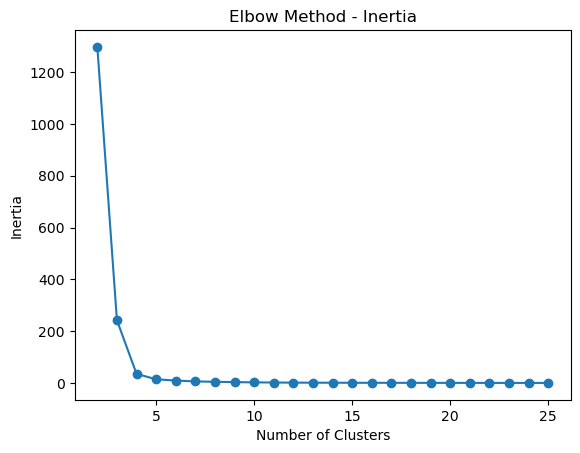

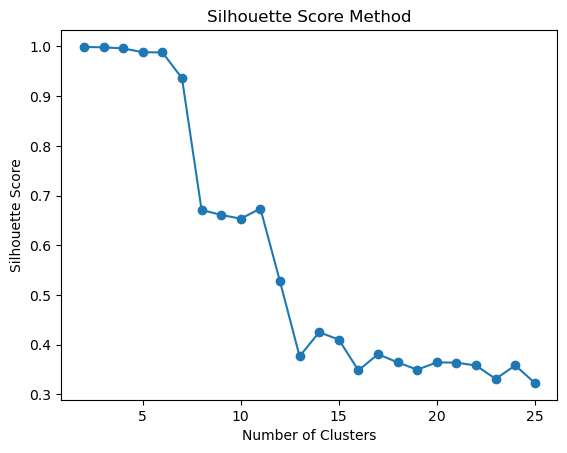

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Prepare your data: remove missing values or perform preprocessing

# Define the range of cluster numbers to evaluate
min_clusters = 2
max_clusters = 25  # Reduce the number of clusters
inertia_values = []
silhouette_scores = []

# Iterate over the range of cluster numbers
for n_clusters in range(min_clusters, max_clusters + 1):
    # Create a K-means clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model to the data
    kmeans.fit(df1_scaled)  # Replace df with your actual DataFrame
    
    # Check the number of unique labels
    unique_labels = set(kmeans.labels_)
    num_labels = len(unique_labels)
    if num_labels < 2:
        continue  # Skip silhouette score calculation if there is only one unique label
    
    # Calculate the inertia
    inertia = kmeans.inertia_
    
    # Calculate the silhouette score
    score = silhouette_score(df1_scaled, kmeans.labels_)
    
    # Append the inertia and silhouette score to the respective lists
    inertia_values.append(inertia)
    silhouette_scores.append(score)

# Plot the inertia values
plt.plot(range(min_clusters, max_clusters + 1), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia')
plt.show()

# Plot the silhouette scores
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


kmeans para 2:

In [5]:
df1_scaled.head()

Mean Returns  Volatility  Volume Mean Returns  Volume Volatility
A        -0.044087   -0.129977            -0.051773          -0.048899
AA       -0.040522   -0.023558            -0.051412          -0.048659
AACG     -0.067850   -0.002420            -0.016629          -0.035926
AADI      0.083181    0.032231            -0.035614          -0.042556
AAIC     -0.076555    0.033309            -0.050244          -0.048261

In [6]:
df1_scaled.shape


(4125, 4)

In [15]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
df1_scaled['Cluster'] = kmeans.fit_predict(df1_scaled)

print(df1_scaled[['Cluster']].sort_values('Cluster'))

# Assuming 'Cluster' is one of the columns in the DataFrame 'X1'
grouped_tickers = df1_scaled.groupby('Cluster').apply(lambda x: x.index.tolist())
tsla_cluster = df1_scaled.loc['TSLA', 'Cluster']

print("Tickers grouped together with TSLA:")
for cluster, tickers in grouped_tickers.items():
    if cluster == tsla_cluster:
        print(f"Cluster {cluster}: {', '.join(tickers)}")

print("Tickers in each cluster:")
for cluster, tickers in grouped_tickers.items():
    print(f"Cluster {cluster}: {', '.join(tickers)}")

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Cluster
SOBR        0
YGMZ        0
GLSI        0
BACK        0
LUMO        0
...       ...
FE          6
FDX         6
FDUS        6
FBK         6
ZYXI        6

[4654 rows x 1 columns]
Tickers grouped together with TSLA:
Cluster 6: A, AA, AACG, AADI, AAIC, AAL, AAME, AAN, AAOI, AAON, AAP, AAPL, AAT, AAU, ABB, ABBV, ABC, ABCB, ABCL, ABCM, ABEO, ABEV, ABG, ABIO, ABM, ABNB, ABR, ABST, ABT, ABUS, ABVC, AC, ACA, ACAD, ACB, ACCO, ACEL, ACER, ACET, ACGL, ACGN, ACHC, ACHR, ACHV, ACI, ACIU, ACIW, ACLS, ACM, ACMR, ACN, ACNB, ACNT, ACOR, ACR, ACRE, ACRS, ACRX, ACST, ACTG, ACU, ADAP, ADBE, ADC, ADCT, ADD, ADEA, ADES, ADI, ADIL, ADM, ADMA, ADMP, ADN, ADNT, ADOC, ADP, ADPT, ADSK, ADT, ADTN, ADTX, ADUS, ADV, ADVM, ADXN, AE, AEE, AEG, AEHL, AEHR, AEI, AEIS, AEL, AEM, AEMD, AENZ, AEO, AEP, AER, AES, AEVA, AEY, AEYE, AEZS, AFBI, AFG, AFIB, AFL, AFMD, AFYA, AG, AGAE, AGBA, AGCO, AGE, AGEN, AGI, AGIL, AGIO, AGLE, AGM, AGMH, AGNC, AGO, AGR, AGRO, AGRX, AGS, AGX, AGYS, AHCO, AHG, AHH, AHT, AI, AIG, 

kmeans Para 8:

In [18]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=8, random_state=42)
df1_scaled['Cluster'] = kmeans.fit_predict(df1_scaled)

print(df1_scaled[['Cluster']].sort_values('Cluster'))

# Assuming 'Cluster' is one of the columns in the DataFrame 'X1'
grouped_tickers = df1_scaled.groupby('Cluster').apply(lambda x: x.index.tolist())
tsla_cluster = df1_scaled.loc['TSLA', 'Cluster']

print("Tickers grouped together with TSLA:")
for cluster, tickers in grouped_tickers.items():
    if cluster == tsla_cluster:
        print(f"Cluster {cluster}: {', '.join(tickers)}")

print("Tickers in each cluster:")
for cluster, tickers in grouped_tickers.items():
    print(f"Cluster {cluster}: {', '.join(tickers)}")

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Cluster
A           0
SGBX        0
IGI         0
SGA         0
SFST        0
...       ...
IDEX        7
MVIS        7
CCL         7
GME         7
FCEL        7

[4123 rows x 1 columns]
Tickers grouped together with TSLA:
Cluster 7: AAL, AAPL, ACB, AMD, AMZN, BAC, BB, BNGO, BOXL, CCL, CRIS, DAL, F, FCEL, GEVO, GME, IDEX, IGC, INO, KODK, LI, MARA, MVIS, NCLH, NIO, NNDM, NVDA, OCGN, PLTR, SNAP, SOLO, SPI, TSLA, UAL, VXRT, XPEV, ZOM
Tickers in each cluster:
Cluster 0: A, AACG, AAIC, AAN, AAOI, AAON, AAT, AAU, ABB, ABC, ABCB, ABCL, ABCM, ABM, ABR, AC, ACA, ACAD, ACCO, ACEL, ACER, ACET, ACGL, ACHC, ACHR, ACHV, ACIW, ACLS, ACM, ACNB, ACNT, ACR, ACRE, ACRX, ACTG, ACU, ADAP, ADC, ADCT, ADES, ADI, ADIL, ADM, ADMA, ADMP, ADOC, ADP, ADTN, ADUS, ADVM, AE, AEE, AEG, AEHR, AEI, AEIS, AEL, AEM, AENZ, AEZS, AFG, AFIB, AFYA, AGAE, AGCO, AGI, AGIO, AGLE, AGM, AGMH, AGNC, AGO, AGR, AGRO, AGS, AGX, AGYS, AHH, AIH, AIM, AIN, AINC, AIR, AIRC, AIRG, AIRI, AIT, AIV, AIZ, AJG, AJRD, AJX, AKAM, AKBA, AKR

Empresas repetidas no dataframe (várias instâncias separadas por ano). aí, por exemplo, tesla2023 pode ser agrupada com apple de 2021.

Spectral para 3:

In [54]:
from sklearn.cluster import SpectralClustering

# Perform spectral clustering
spectral = SpectralClustering(n_clusters=4, random_state=42)
df1_scaled['Cluster'] = spectral.fit_predict(df1_scaled)

print(df1_scaled[['Cluster']].sort_values('Cluster'))

# Assuming 'Cluster' is one of the columns in the DataFrame 'df3_scaled'
grouped_tickers = df1_scaled.groupby('Cluster').apply(lambda x: x.index.tolist())
tsla_cluster = df1_scaled.loc['TSLA', 'Cluster']

print("Tickers grouped together with TSLA:")
for cluster, tickers in grouped_tickers.items():
    if cluster == tsla_cluster:
        print(f"Cluster {cluster}: {', '.join(tickers)}")

print("Tickers in each cluster:")
for cluster, tickers in grouped_tickers.items():
    print(f"Cluster {cluster}: {', '.join(tickers)}")

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


      Cluster
A           0
OPBK        0
OPAD        0
OOMA        0
ONVO        0
...       ...
FDBC        0
FCX         0
FE          0
ZYXI        0
ODV         1

[4655 rows x 1 columns]
Tickers grouped together with TSLA:
Cluster 0: A, AA, AACG, AADI, AAIC, AAL, AAME, AAN, AAOI, AAON, AAP, AAPL, AAT, AAU, ABB, ABBV, ABC, ABCB, ABCL, ABCM, ABEO, ABEV, ABG, ABIO, ABM, ABNB, ABR, ABST, ABT, ABUS, ABVC, AC, ACA, ACAD, ACB, ACCD, ACCO, ACEL, ACER, ACET, ACGL, ACGN, ACHC, ACHR, ACHV, ACI, ACIU, ACIW, ACLS, ACM, ACMR, ACN, ACNB, ACNT, ACOR, ACR, ACRE, ACRS, ACRX, ACST, ACTG, ACU, ADAP, ADBE, ADC, ADCT, ADD, ADEA, ADES, ADI, ADIL, ADM, ADMA, ADMP, ADN, ADNT, ADOC, ADP, ADPT, ADSK, ADT, ADTN, ADTX, ADUS, ADV, ADVM, ADXN, AE, AEE, AEG, AEHL, AEHR, AEI, AEIS, AEL, AEM, AEMD, AENZ, AEO, AEP, AER, AES, AEVA, AEY, AEYE, AEZS, AFBI, AFG, AFIB, AFL, AFMD, AFYA, AG, AGAE, AGBA, AGCO, AGE, AGEN, AGI, AGIL, AGIO, AGLE, AGM, AGMH, AGNC, AGO, AGR, AGRO, AGRX, AGS, AGX, AGYS, AHCO, AHG, AHH, AHT, AI,

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  est = KMeans(


In [56]:
cluster_counts = df1_scaled['Cluster'].value_counts()

print("Number of tickers in each cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} tickers")


Number of tickers in each cluster:
Cluster 0: 4654 tickers
Cluster 1: 1 tickers


Spectral para 8:

In [57]:
from sklearn.cluster import SpectralClustering

# Perform spectral clustering
spectral = SpectralClustering(n_clusters=9, random_state=42)
df1_scaled['Cluster'] = spectral.fit_predict(df1_scaled)

print(df1_scaled[['Cluster']].sort_values('Cluster'))

# Assuming 'Cluster' is one of the columns in the DataFrame 'df3_scaled'
grouped_tickers = df1_scaled.groupby('Cluster').apply(lambda x: x.index.tolist())
tsla_cluster = df1_scaled.loc['TSLA', 'Cluster']

print("Tickers grouped together with TSLA:")
for cluster, tickers in grouped_tickers.items():
    if cluster == tsla_cluster:
        print(f"Cluster {cluster}: {', '.join(tickers)}")

print("Tickers in each cluster:")
for cluster, tickers in grouped_tickers.items():
    print(f"Cluster {cluster}: {', '.join(tickers)}")

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


      Cluster
A           0
OPBK        0
OPAD        0
OOMA        0
ONVO        0
...       ...
FDBC        0
FCX         0
FE          0
ZYXI        0
ODV         1

[4655 rows x 1 columns]
Tickers grouped together with TSLA:
Cluster 0: A, AA, AACG, AADI, AAIC, AAL, AAME, AAN, AAOI, AAON, AAP, AAPL, AAT, AAU, ABB, ABBV, ABC, ABCB, ABCL, ABCM, ABEO, ABEV, ABG, ABIO, ABM, ABNB, ABR, ABST, ABT, ABUS, ABVC, AC, ACA, ACAD, ACB, ACCD, ACCO, ACEL, ACER, ACET, ACGL, ACGN, ACHC, ACHR, ACHV, ACI, ACIU, ACIW, ACLS, ACM, ACMR, ACN, ACNB, ACNT, ACOR, ACR, ACRE, ACRS, ACRX, ACST, ACTG, ACU, ADAP, ADBE, ADC, ADCT, ADD, ADEA, ADES, ADI, ADIL, ADM, ADMA, ADMP, ADN, ADNT, ADOC, ADP, ADPT, ADSK, ADT, ADTN, ADTX, ADUS, ADV, ADVM, ADXN, AE, AEE, AEG, AEHL, AEHR, AEI, AEIS, AEL, AEM, AEMD, AENZ, AEO, AEP, AER, AES, AEVA, AEY, AEYE, AEZS, AFBI, AFG, AFIB, AFL, AFMD, AFYA, AG, AGAE, AGBA, AGCO, AGE, AGEN, AGI, AGIL, AGIO, AGLE, AGM, AGMH, AGNC, AGO, AGR, AGRO, AGRX, AGS, AGX, AGYS, AHCO, AHG, AHH, AHT, AI,

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  est = KMeans(


In [19]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df1_scaled['Cluster'] = dbscan.fit_predict(df1_scaled)

print(df1_scaled[['Cluster']].sort_values('Cluster'))

# Assuming 'Cluster' is one of the columns in the DataFrame 'df3_scaled'
grouped_tickers = df1_scaled.groupby('Cluster').apply(lambda x: x.index.tolist())
tsla_cluster = df1_scaled.loc['TSLA', 'Cluster']

print("Tickers grouped together with TSLA:")
for cluster, tickers in grouped_tickers.items():
    if cluster == tsla_cluster:
        print(f"Cluster {cluster}: {', '.join(tickers)}")

print("Tickers in each cluster:")
for cluster, tickers in grouped_tickers.items():
    print(f"Cluster {cluster}: {', '.join(tickers)}")

      Cluster
BKNG       -1
BNGO       -1
SKIL       -1
NVR        -1
MCRB       -1
...       ...
AMD         7
BB          7
NCLH        7
SOLO        7
NVDA        7

[4123 rows x 1 columns]
Tickers grouped together with TSLA:
Cluster -1: AAL, AAPL, ABCL, ABIO, ACB, ACCD, AGRX, AI, AMZN, AREC, ASTC, AULT, AYTU, BA, BAC, BACK, BIIB, BKKT, BKNG, BMRA, BNGO, BRN, BTB, BTWN, BXRX, CCL, CELZ, CHRD, CLVR, CMG, CMPO, CRIS, CVT, DASH, DTSS, EQ, F, FCEL, FWBI, GB, GEVO, GLSI, GME, HLLY, IDEX, IGC, IKT, INBS, INO, KODK, KXIN, LRMR, LUMO, MCRB, MELI, MP, MRNA, MVIS, NIO, NNDM, NUWE, NUZE, NVAX, NVR, OCG, OCGN, PIXY, PLTR, PSHG, QNRX, QS, RADI, REPX, RMED, SAM, SASI, SEB, SGTX, SKIL, SNPX, SOS, SPI, SPRY, STEM, SUNW, TSLA, UPST, VIRI, VRNA, VVOS, VXRT, WAFU, WISA, WKHS, WNW, XELA, XPEV, YGMZ, ZM, ZOM
Tickers in each cluster:
Cluster -1: AAL, AAPL, ABCL, ABIO, ACB, ACCD, AGRX, AI, AMZN, AREC, ASTC, AULT, AYTU, BA, BAC, BACK, BIIB, BKKT, BKNG, BMRA, BNGO, BRN, BTB, BTWN, BXRX, CCL, CELZ, CHRD, CLV

In [60]:
cluster_counts = df1_scaled['Cluster'].value_counts()

print("Number of tickers in each cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} tickers")


Number of tickers in each cluster:
Cluster 0: 4594 tickers
Cluster -1: 61 tickers


Período 2

In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = []
with open('tickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2021-01-01", end="2022-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
X2 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
X2['Close STD'] = df.groupby('Ticker')['Close'].std()
X2['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
X2['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X2['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Adicione os retornos médios e a volatilidade ao dataframe
X2['Mean Returns'] = mean_returns
X2['Volatility'] = volatility

X2['Volume Mean Returns'] = mean_returns2
X2['Volume Volatility'] = volatility2

# Exiba o dataframe resultante
print(X2.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAMC: Data doesn't exist for startDate = 1609477200, endDate = 1641013200
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[******

In [21]:
X2.head()

Close STD    Volume STD  Mean Returns  Volatility  Volume Mean Returns  \
A     16.619439  7.098475e+05      0.001268    0.013028             0.069666   
AA    10.001692  3.982020e+06      0.004535    0.039720             0.101028   
AAC    0.052946  4.349658e+05     -0.000061    0.003633             3.012020   
AACG   1.357207  2.009547e+07      0.030750    0.604645            60.418332   
AADI   4.979540  1.380331e+06      0.003717    0.068073             4.238825   

      Volume Volatility  
A              0.469765  
AA             0.568179  
AAC           10.813297  
AACG         940.261950  
AADI          47.062251

In [73]:
import pandas as pd



# Drop rows with NaN values
X2.dropna(axis=0, inplace=True)

# Get the shape of the dataset
shape = X2.shape

print("Shape of the dataset:", shape)

Shape of the dataset: (4593, 12)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Drop columns that are not mean returns or volatility
df2 = X2[['Mean Returns', 'Volatility','Volume Mean Returns','Volume Volatility','Close STD', 'Volume STD']]

# Drop rows with NaN values
df2 = df2.dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2)

# Create a new DataFrame with the scaled data
df2_scaled = pd.DataFrame(scaled_data, columns=df2.columns, index=df2.index)

# Print the updated DataFrame
print(df2_scaled)

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Drop columns that are not mean returns or volatility
df2 = X2[['Mean Returns', 'Volatility','Volume Mean Returns','Volume Volatility','Close STD', 'Volume STD']]

# Drop rows with NaN values
df2 = df2.dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2)

# Create a new DataFrame with the scaled data
df2_scaled = pd.DataFrame(scaled_data, columns=df2.columns, index=df2.index)

# Print the updated DataFrame
print(df2_scaled)

      Mean Returns  Volatility  Volume Mean Returns  Volume Volatility  \
A         0.112977   -0.397309            -0.058732          -0.055985   
AA        0.677344    0.009662            -0.058120          -0.055794   
AAC      -0.116783   -0.540564            -0.001355          -0.035935   
AACG      5.206616    8.623087             1.118094           1.765689   
AADI      0.536104    0.441954             0.022569           0.034329   
...            ...         ...                  ...                ...   
ZVIA     -0.896419    0.168072            -0.056725          -0.054709   
ZWS       0.015839   -0.024120            -0.057826          -0.055668   
ZYME     -0.725111   -0.005221            -0.055506          -0.055034   
ZYNE      0.150020    0.422087            -0.052427          -0.051991   
ZYXI     -0.205374   -0.009778            -0.056801          -0.055146   

      Close STD  Volume STD  
A      0.066691   -0.196148  
AA    -0.018646    0.380910  
AAC   -0.146936   -0.

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\clust

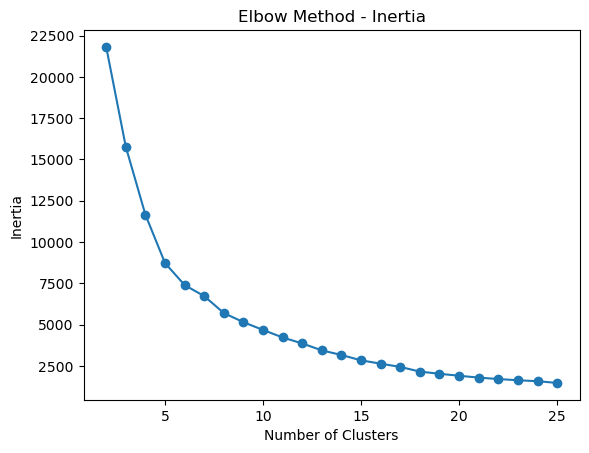

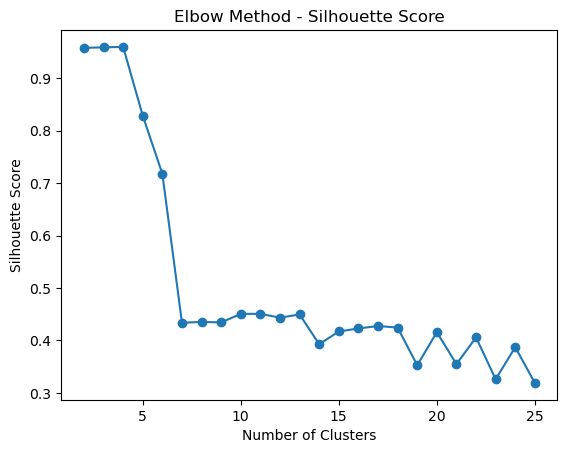

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Drop any missing values or perform necessary preprocessing steps on df2

# Define the range of cluster numbers to evaluate
min_clusters = 2
max_clusters = 25

# Initialize lists to store the inertia and silhouette scores for each cluster number
inertia_values = []
silhouette_scores = []

# Iterate over the range of cluster numbers
for n_clusters in range(min_clusters, max_clusters + 1):
    # Create a K-means clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model to the data
    kmeans.fit(df2_scaled)
    
    # Calculate the inertia and silhouette score
    inertia = kmeans.inertia_
    score = silhouette_score(df2_scaled, kmeans.labels_)
    
    # Append the inertia and silhouette score to the respective lists
    inertia_values.append(inertia)
    silhouette_scores.append(score)

# Plot the inertia values
plt.plot(range(min_clusters, max_clusters + 1), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia')
plt.show()

# Plot the silhouette scores
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method - Silhouette Score')
plt.show()

Para 3

In [29]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=15, random_state=42)
df2_scaled['Cluster'] = kmeans.fit_predict(df2_scaled)

print(df2_scaled[['Cluster']].sort_values('Cluster'))

# Assuming 'Cluster' is one of the columns in the DataFrame 'X1'
grouped_tickers = df2_scaled.groupby('Cluster').apply(lambda x: x.index.tolist())
tsla_cluster = df2_scaled.loc['TSLA', 'Cluster']

print("Tickers grouped together with TSLA:")
for cluster, tickers in grouped_tickers.items():
    if cluster == tsla_cluster:
        print(f"Cluster {cluster}: {', '.join(tickers)}")

print("Tickers in each cluster:")
for cluster, tickers in grouped_tickers.items():
    print(f"Cluster {cluster}: {', '.join(tickers)}")


c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Cluster
RDNT        0
CNOB        0
TPX         0
RMCF        0
CNHI        0
...       ...
BFRI       14
CLOV       14
NIO        14
NOK        14
F          14

[4955 rows x 1 columns]
Tickers grouped together with TSLA:
Cluster 14: BB, BFRI, BNGO, CLOV, DWAC, EXPR, F, GSAT, LCID, METX, MPU, MRIN, NIO, NOK, OCGN, PHUN, PLTR, SENS, SNDL, SOPA, TSLA
Tickers in each cluster:
Cluster 0: AAN, AAP, ABG, ABNB, ACEL, ACER, ACI, ACLS, ACM, ACMR, ACN, ACTG, ADBE, ADES, ADNT, ADP, ADTN, AE, AEL, AEO, AER, AFG, AGM, AGO, AGS, AGTI, AGYS, AIG, AIV, AKR, ALB, ALEX, ALGM, ALGN, ALIM, ALLT, ALNY, ALPN, ALTG, ALYA, AMAT, AMBA, AMCX, AMG, AMKR, AMN, AMNB, AMP, AMRC, AMRK, AMSWA, AMTB, AN, ANAB, ANDE, ANET, ANF, ANGO, ANIP, ANIX, AON, AOS, AOSL, AOUT, APA, APG, APO, APOG, APP, APYX, AQUA, ARC, ARCB, ARCH, ARES, ARGX, ARLO, ARNC, ARTW, ASGN, ASIX, ASLE, ASML, ASO, ASPS, ASX, ASYS, ATEN, ATEX, ATKR, ATRC, ATTO, AUD, AVB, AVDL, AVGO, AVID, AVNT, AVTR, AVY, AWI, AWX, AX, AXL, AXON, AXP, AYI, AZTA, BA

Para 8

In [64]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
df2_scaled['Cluster'] = kmeans.fit_predict(df2_scaled)

print(df2_scaled[['Cluster']].sort_values('Cluster'))

# Assuming 'Cluster' is one of the columns in the DataFrame 'X1'
grouped_tickers = df2_scaled.groupby('Cluster').apply(lambda x: x.index.tolist())
tsla_cluster = df2_scaled.loc['TSLA', 'Cluster']

print("Tickers grouped together with TSLA:")
for cluster, tickers in grouped_tickers.items():
    if cluster == tsla_cluster:
        print(f"Cluster {cluster}: {', '.join(tickers)}")

print("Tickers in each cluster:")
for cluster, tickers in grouped_tickers.items():
    print(f"Cluster {cluster}: {', '.join(tickers)}")

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Cluster
LH          0
NEU         0
TMBR        0
TMO         0
NDSN        0
...       ...
GEVO        8
AAL         8
OCGN        8
BNGO        8
ZOM         8

[4633 rows x 1 columns]
Tickers grouped together with TSLA:
Cluster 8: AAL, AAPL, BNGO, GEVO, NIO, OCGN, PLTR, TSLA, ZOM
Tickers in each cluster:
Cluster 0: AAP, ACN, ADBE, ADP, ADSK, ADTX, ALGN, ALGT, ALX, AMED, AMGN, AMP, AMT, ANSS, AON, APD, APPF, APRE, ARE, ARGX, ASML, ASND, ASR, ATNF, ATNX, ATRI, AVB, AVGO, AYTU, BAND, BAP, BDX, BFAM, BGNE, BIDU, BIIB, BIO, BIOC, BIOR, BLD, BLK, BNMV, BURL, BVXV, CACC, CACI, CASY, CAT, CCI, CFRX, CHE, CHTR, CI, CLX, CLXT, CME, CMI, COKE, COMS, COO, COST, CRL, CRM, CRWD, CTAS, CVCO, CVNA, DASH, DE, DECK, DEO, DG, DHR, DJCO, DOCU, DPZ, DUO, EBON, ECL, EDU, EFX, EL, ELOX, ELV, ENVB, EPAM, EQIX, ERIE, ESGR, ESS, ETSY, FCNCA, FDX, FFIV, FICO, FIVE, FIVN, FLT, FRLN, FUV, FVRR, GD, GHC, GLOB, GLPG, GMBL, GNRC, GOCO, GPN, GRVY, GS, GWW, HCA, HD, HELE, HIFS, HII, HON, HUBB, HUBS, HUM, ICLR,

Cluster 8: AAL, AAPL, BNGO, GEVO, NIO, OCGN, PLTR, TSLA, ZOM


Spectral para 3

In [50]:
from sklearn.cluster import SpectralClustering

# Perform spectral clustering
spectral = SpectralClustering(n_clusters=3, random_state=42)
df2_scaled['Cluster'] = spectral.fit_predict(df2_scaled)

print(df2_scaled[['Cluster']].sort_values('Cluster'))

# Assuming 'Cluster' is one of the columns in the DataFrame 'df3_scaled'
grouped_tickers = df2_scaled.groupby('Cluster').apply(lambda x: x.index.tolist())
tsla_cluster = df2_scaled.loc['TSLA', 'Cluster']

print("Tickers grouped together with TSLA:")
for cluster, tickers in grouped_tickers.items():
    if cluster == tsla_cluster:
        print(f"Cluster {cluster}: {', '.join(tickers)}")

print("Tickers in each cluster:")
for cluster, tickers in grouped_tickers.items():
    print(f"Cluster {cluster}: {', '.join(tickers)}")

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


      Cluster
ZYXI        0
BCO         0
PGR         0
PGNY        0
WST         0
...       ...
FFIE        2
FFIC        2
FFBC        2
FFWM        2
KMDA        2

[4633 rows x 1 columns]
Tickers grouped together with TSLA:
Cluster 2: A, AA, AACG, AADI, AAIC, AAL, AAME, AAN, AAOI, AAON, AAP, AAPL, AAT, AAU, ABB, ABBV, ABC, ABCB, ABCL, ABCM, ABEO, ABEV, ABG, ABIO, ABM, ABNB, ABR, ABST, ABT, ABUS, ABVC, AC, ACA, ACAD, ACB, ACCD, ACCO, ACEL, ACER, ACET, ACGL, ACGN, ACHC, ACHV, ACI, ACIU, ACIW, ACLS, ACM, ACMR, ACN, ACNB, ACNT, ACOR, ACR, ACRE, ACRS, ACRX, ACST, ACTG, ACU, ADAP, ADBE, ADC, ADCT, ADD, ADEA, ADES, ADI, ADIL, ADM, ADMA, ADMP, ADN, ADNT, ADOC, ADP, ADPT, ADSK, ADT, ADTN, ADTX, ADUS, ADV, ADVM, ADXN, AE, AEE, AEG, AEHL, AEHR, AEI, AEIS, AEL, AEM, AEMD, AENZ, AEO, AEP, AER, AES, AEVA, AEY, AEYE, AEZS, AFBI, AFG, AFIB, AFL, AFMD, AFYA, AG, AGAE, AGBA, AGCO, AGE, AGEN, AGI, AGIL, AGIO, AGLE, AGM, AGMH, AGNC, AGO, AGR, AGRO, AGRX, AGS, AGX, AGYS, AHCO, AHG, AHH, AHT, AI, AIG, 

Spectral para 8

In [30]:
from sklearn.cluster import SpectralClustering

# Perform spectral clustering
spectral = SpectralClustering(n_clusters=15, random_state=42)
df2_scaled['Cluster'] = spectral.fit_predict(df2_scaled)

print(df2_scaled[['Cluster']].sort_values('Cluster'))

# Assuming 'Cluster' is one of the columns in the DataFrame 'df3_scaled'
grouped_tickers = df2_scaled.groupby('Cluster').apply(lambda x: x.index.tolist())
tsla_cluster = df2_scaled.loc['TSLA', 'Cluster']

print("Tickers grouped together with TSLA:")
for cluster, tickers in grouped_tickers.items():
    if cluster == tsla_cluster:
        print(f"Cluster {cluster}: {', '.join(tickers)}")

print("Tickers in each cluster:")
for cluster, tickers in grouped_tickers.items():
    print(f"Cluster {cluster}: {', '.join(tickers)}")

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


      Cluster
A           0
OPTT        0
OPTN        0
OPRX        0
OPRT        0
...       ...
FBP         0
FBNC        0
FCCO        0
ZYXI        0
SNTG        1

[4955 rows x 1 columns]
Tickers grouped together with TSLA:
Cluster 0: A, AA, AAC, AACG, AADI, AAIC, AAL, AAME, AAN, AAOI, AAON, AAP, AAPL, AAT, AAU, ABB, ABBV, ABC, ABCB, ABCL, ABCM, ABEO, ABEV, ABG, ABIO, ABM, ABNB, ABOS, ABR, ABSI, ABST, ABT, ABUS, AC, ACA, ACAD, ACB, ACCD, ACCO, ACEL, ACER, ACET, ACGL, ACGN, ACHC, ACHL, ACHR, ACHV, ACI, ACIU, ACIW, ACLS, ACM, ACMR, ACN, ACNB, ACOR, ACR, ACRE, ACRS, ACRX, ACST, ACT, ACTG, ACU, ACVA, ACXP, ADAG, ADAL, ADAP, ADBE, ADC, ADCT, ADD, ADEA, ADES, ADI, ADIL, ADM, ADMA, ADMP, ADN, ADNT, ADP, ADPT, ADSK, ADT, ADTN, ADTX, ADUS, ADV, ADVM, AE, AEE, AEG, AEHL, AEHR, AEI, AEIS, AEL, AEM, AEMD, AENZ, AEO, AEP, AER, AES, AEVA, AEY, AEYE, AEZS, AFCG, AFG, AFIB, AFL, AFMD, AFRM, AFTR, AFYA, AG, AGAE, AGCO, AGE, AGEN, AGFY, AGI, AGIO, AGL, AGLE, AGM, AGMH, AGNC, AGO, AGR, AGRI, AGRO, A

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  est = KMeans(


In [31]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df2_scaled['Cluster'] = dbscan.fit_predict(df2_scaled)

print(df2_scaled[['Cluster']].sort_values('Cluster'))

# Assuming 'Cluster' is one of the columns in the DataFrame 'df3_scaled'
grouped_tickers = df2_scaled.groupby('Cluster').apply(lambda x: x.index.tolist())
tsla_cluster = df2_scaled.loc['TSLA', 'Cluster']

print("Tickers grouped together with TSLA:")
for cluster, tickers in grouped_tickers.items():
    if cluster == tsla_cluster:
        print(f"Cluster {cluster}: {', '.join(tickers)}")

print("Tickers in each cluster:")
for cluster, tickers in grouped_tickers.items():
    print(f"Cluster {cluster}: {', '.join(tickers)}")


      Cluster
F          -1
FSBC       -1
OCGN       -1
BFRI       -1
PRVA       -1
...       ...
FFIV        0
FFIN        0
FFIE        0
FGF         0
ZYXI        0

[4955 rows x 1 columns]
Tickers grouped together with TSLA:
Cluster -1: AACG, AAPL, ADAL, AEHR, AEMD, AGRX, AHI, ALZN, AMC, ANY, APVO, ARVL, ATER, ATIF, AULT, AUVI, AVAH, AZO, BABA, BB, BBIG, BFRI, BHG, BIRD, BKKT, BNGO, BSQR, BTBT, BTCS, BXRX, BYSI, CAR, CDRE, CELZ, CENN, CING, CLOV, CMG, CNM, CNTX, CPOP, CYAD, DLPN, DPRO, DSEY, DSS, DTST, DWAC, DXLG, EAR, EDR, EDU, EEIQ, EJH, ENTX, ERNA, EXPR, F, FSBC, FTFT, FUTU, FWBI, GBR, GFAI, GMBL, GME, GNLN, GOTU, GREE, GRTS, GSAT, HCWB, HNST, IINN, IMPP, INCR, IOT, ISIG, ISPC, IVVD, JUN, KAVL, KD, KOSS, KTTA, KXIN, LCID, LGVN, LITM, LODE, LWLG, MCOM, MDIA, MELI, METX, MKUL, MMAT, MPU, MRIN, MRNA, MSTR, NAK, NAOV, NEGG, NIO, NOK, NRSN, NTRB, NURO, NUWE, NUZE, NVDA, NVR, NXGL, OCGN, OIG, OP, OXUS, PBLA, PHUN, PLTR, PMCB, PPSI, PRPO, PRVA, QH, RGC, RHE, RIVN, RKT, RNAZ, RNXT, RPHM

Período 3

In [34]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = []
with open('tickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2021-01-01", end="2022-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
X3 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
X3['Close STD'] = df.groupby('Ticker')['Close'].std()
X3['Volume STD'] = df.groupby('Ticker')['Volume'].std()

X3['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X3['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas


# Adicione os retornos médios e a volatilidade ao dataframe
X3['Mean Returns'] = mean_returns
X3['Volatility'] = volatility

X3['Volume Mean Returns'] = mean_returns2
X3['Volume Volatility'] = volatility2

# Exiba o dataframe resultante
print(X3.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAMC: Data doesn't exist for startDate = 1609477200, endDate = 1641013200
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[******

KeyboardInterrupt: 

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Drop columns that are not mean returns or volatility
df3 = X3[['Mean Returns', 'Volatility','Mean','Close STD', 'Volume STD']]

# Drop rows with NaN values
df3 = df3.dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df3)

# Create a new DataFrame with the scaled data
df3_scaled = pd.DataFrame(scaled_data, columns=df3.columns, index=df3.index)

# Print the updated DataFrame
print(df3_scaled)

        Mean Returns  Volatility      Mean  Close STD  Volume STD
Ticker                                                           
A           0.145287   -0.180385  0.788435   0.179741   -0.181509
AA          0.103796   -0.010250  0.140885   0.382171    0.829730
AAC         0.152925   -0.362482 -0.258107  -0.272146   -0.067868
AACG        0.546255    0.402056 -0.328773  -0.259299    0.013111
AADI       -0.110212   -0.032718 -0.214200  -0.154640   -0.374241
...              ...         ...       ...        ...         ...
ZVSA       -0.292411    0.547988 -0.260212  -0.194907   -0.394228
ZWS        -0.095625   -0.136449 -0.096307  -0.098427   -0.200223
ZYME       -0.033775    0.140391 -0.282521  -0.189787    0.475418
ZYNE       -0.605440    0.066167 -0.330526  -0.247310   -0.161187
ZYXI        0.461850   -0.005324 -0.267636  -0.172821   -0.331189

[5834 rows x 5 columns]


In [26]:
import pandas as pd

# Assuming your DataFrame is stored in the variable 'df'
df3_scaled.to_csv('df3_scaled.csv', index=False)

In [22]:
import pandas as pd

# Read the CSV file
df3_scaled = pd.read_csv('df3_scaled.csv')

In [25]:
if 'TSLA' in df3_scaled.index:
    print("TSLA is present in df3_scaled.")
else:
    print("TSLA is not present in df3_scaled.")


TSLA is present in df3_scaled.


c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\clust

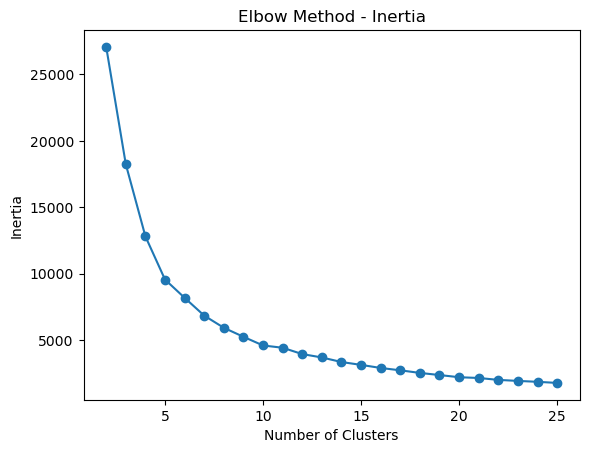

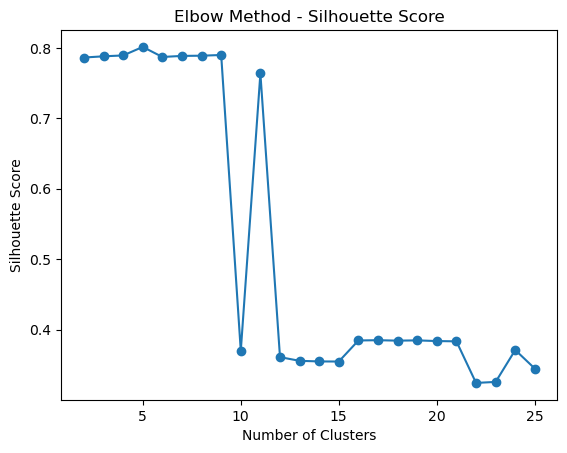

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Drop any missing values or perform necessary preprocessing steps on df2

# Define the range of cluster numbers to evaluate
min_clusters = 2
max_clusters = 25

# Initialize lists to store the inertia and silhouette scores for each cluster number
inertia_values = []
silhouette_scores = []

# Iterate over the range of cluster numbers
for n_clusters in range(min_clusters, max_clusters + 1):
    # Create a K-means clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model to the data
    kmeans.fit(df3_scaled)
    
    # Calculate the inertia and silhouette score
    inertia = kmeans.inertia_
    score = silhouette_score(df3_scaled, kmeans.labels_)
    
    # Append the inertia and silhouette score to the respective lists
    inertia_values.append(inertia)
    silhouette_scores.append(score)

# Plot the inertia values
plt.plot(range(min_clusters, max_clusters + 1), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia')
plt.show()

# Plot the silhouette scores
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method - Silhouette Score')
plt.show()


In [68]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df3_scaled['Cluster'] = dbscan.fit_predict(df3_scaled)

print(df3_scaled[['Cluster']].sort_values('Cluster'))

# Assuming 'Cluster' is one of the columns in the DataFrame 'df3_scaled'
grouped_tickers = df3_scaled.groupby('Cluster').apply(lambda x: x.index.tolist())
tsla_cluster = df3_scaled.loc['TSLA', 'Cluster']

print("Tickers grouped together with TSLA:")
for cluster, tickers in grouped_tickers.items():
    if cluster == tsla_cluster:
        print(f"Cluster {cluster}: {', '.join(tickers)}")

print("Tickers in each cluster:")
for cluster, tickers in grouped_tickers.items():
    print(f"Cluster {cluster}: {', '.join(tickers)}")


        Cluster
Ticker         
METX         -1
OKTA         -1
CPTN         -1
PLTR         -1
LTRPB        -1
...         ...
ALLR          2
FWBI          2
DAVE          2
GMBL          2
SWVL          2

[5834 rows x 1 columns]
Tickers grouped together with TSLA:
Cluster -1: AAPL, ADBE, ADN, AFRM, AGFY, AGRI, AGRX, AIMD, ALGN, AMAM, AMC, AMD, AMPX, AMTD, AMV, AMZN, APDN, ARVL, ASML, ATAT, ATER, ATLX, ATRI, ATXG, AULT, AZO, BABA, BBBY, BGXX, BHAT, BHVN, BIAF, BIO, BKNG, BLK, BWV, BXRX, CABO, CBIO, CCL, CFRX, CHE, CHTR, CMG, COIN, COMS, COSM, CPTN, CVNA, CVX, DBGI, DIS, DRUG, EAR, EJH, ELV, ENPH, ENSC, ENSV, EPAM, EQIX, F, FCNCA, FFIE, FICO, FOXO, FSLR, GCT, GHC, GNRC, GOEV, GOOG, GOOGL, GOVX, GRAB, GRI, HKD, HPCO, HUBS, HUDI, HUSA, HYMC, IDXX, ILAG, ILMN, INDO, INTU, ISPO, JEWL, JZ, KALA, KAVL, KRTX, KWE, LIPO, LRCX, LTRPB, LYT, MBC, MCOM, MDB, MDGL, MEGL, MELI, META, METX, MGAM, MKL, MMM, MOB, MSFT, MSTR, MTC, MTD, MULN, NFLX, NINE, NIO, NOGN, NOW, NRSN, NU, NUWE, NVAX, NVDA, NVR,

In [69]:
cluster_counts = df3_scaled['Cluster'].value_counts()

print("Number of tickers in each cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} tickers")


Number of tickers in each cluster:
Cluster 0: 5622 tickers
Cluster -1: 199 tickers
Cluster 1: 8 tickers
Cluster 2: 5 tickers


groupe with  tesla Cluster -1: AAPL, ADBE, ADN, AFRM, AGFY, AGRI, AGRX, AIMD, ALGN, AMAM, AMC, AMD, AMPX, AMTD, AMV, AMZN, APDN, ARVL, ASML, ATAT, ATER, ATLX, ATRI, ATXG, AULT, AZO, BABA, BBBY, BGXX, BHAT, BHVN, BIAF, BIO, BKNG, BLK, BWV, BXRX, CABO, CBIO, CCL, CFRX, CHE, CHTR, CMG, COIN, COMS, COSM, CPTN, CVNA, CVX, DBGI, DIS, DRUG, EAR, EJH, ELV, ENPH, ENSC, ENSV, EPAM, EQIX, F, FCNCA, FFIE, FICO, FOXO, FSLR, GCT, GHC, GNRC, GOEV, GOOG, GOOGL, GOVX, GRAB, GRI, HKD, HPCO, HUBS, HUDI, HUSA, HYMC, IDXX, ILAG, ILMN, INDO, INTU, ISPO, JEWL, JZ, KALA, KAVL, KRTX, KWE, LIPO, LRCX, LTRPB, LYT, MBC, MCOM, MDB, MDGL, MEGL, MELI, META, METX, MGAM, MKL, MMM, MOB, MSFT, MSTR, MTC, MTD, MULN, NFLX, NINE, NIO, NOGN, NOW, NRSN, NU, NUWE, NVAX, NVDA, NVR, NVTA, OCTO, OKTA, ORLY, OXY, PALI, PBLA, PBTS, PCG, PDD, PHVS, PIXY, PLTR, PTON, PYPL, QNRX, QRTEB, RAYA, REGN, REUN, REVB, RH, RIVN, ROG, ROKU, RXDX, SATX, SBFM, SE, SEB, SHOP, SHPH, SI, SILO, SLNA, SMMT, SNAP, SNOW, SOBR, SOFI, SQ, STBX, SWN, SXTC, T, TBLT, TDG, TDOC, TEAM, TGL, TLRY, TMO, TPL, TSLA, TSM, TWLO, TXMD, U, UNH, UPST, USEA, VEDU, VERU, VRAX, W, WETG, WLDS, WST, WTM, XELA, XOM, XPEV, ZBRA


In [34]:
df3_scaled.corr()

Mean Returns  Volatility      Mean  Close STD  Volume STD  \
Mean Returns      1.000000    0.850422  0.016010  -0.023951    0.106849   
Volatility        0.850422    1.000000 -0.038389   0.028791    0.211299   
Mean              0.016010   -0.038389  1.000000   0.635515   -0.041278   
Close STD        -0.023951    0.028791  0.635515   1.000000   -0.007879   
Volume STD        0.106849    0.211299 -0.041278  -0.007879    1.000000   
Cluster           0.010978    0.097053  0.267013   0.234821    0.476098   

               Cluster  
Mean Returns  0.010978  
Volatility    0.097053  
Mean          0.267013  
Close STD     0.234821  
Volume STD    0.476098  
Cluster       1.000000

Spectral para 3

In [52]:
from sklearn.cluster import SpectralClustering

# Perform spectral clustering
spectral = SpectralClustering(n_clusters=3, random_state=42)
df3_scaled['Cluster'] = spectral.fit_predict(df3_scaled)

print(df3_scaled[['Cluster']].sort_values('Cluster'))

# Assuming 'Cluster' is one of the columns in the DataFrame 'df3_scaled'
grouped_tickers = df3_scaled.groupby('Cluster').apply(lambda x: x.index.tolist())
tsla_cluster = df3_scaled.loc['TSLA', 'Cluster']

print("Tickers grouped together with TSLA:")
for cluster, tickers in grouped_tickers.items():
    if cluster == tsla_cluster:
        print(f"Cluster {cluster}: {', '.join(tickers)}")

print("Tickers in each cluster:")
for cluster, tickers in grouped_tickers.items():
    print(f"Cluster {cluster}: {', '.join(tickers)}")


        Cluster
Ticker         
A             0
ONVO          0
ONTX          0
ONTO          0
ONTF          0
...         ...
FCFS          0
FCF           0
ZYXI          0
ATXG          1
COSM          2

[5834 rows x 1 columns]
Tickers grouped together with TSLA:
Cluster 0: A, AA, AAC, AACG, AADI, AAIC, AAL, AAMC, AAME, AAN, AAOI, AAON, AAP, AAPL, AAT, AAU, ABB, ABBV, ABC, ABCB, ABCL, ABCM, ABEO, ABEV, ABG, ABIO, ABM, ABNB, ABOS, ABR, ABSI, ABST, ABT, ABUS, ABVC, AC, ACA, ACAB, ACAC, ACAD, ACAH, ACAX, ACB, ACBA, ACCD, ACCO, ACDC, ACEL, ACER, ACET, ACGL, ACGN, ACHC, ACHL, ACHR, ACHV, ACI, ACIU, ACIW, ACLS, ACLX, ACM, ACMR, ACN, ACNB, ACNT, ACON, ACOR, ACR, ACRE, ACRO, ACRS, ACRV, ACRX, ACST, ACT, ACTG, ACU, ACVA, ACXP, ADAG, ADAL, ADAP, ADBE, ADC, ADCT, ADD, ADEA, ADER, ADES, ADEX, ADI, ADIL, ADM, ADMA, ADMP, ADN, ADNT, ADOC, ADP, ADPT, ADRT, ADSE, ADSK, ADT, ADTH, ADTN, ADTX, ADUS, ADV, ADVM, ADXN, AE, AEAE, AEE, AEG, AEHL, AEHR, AEI, AEIS, AEL, AEM, AEMD, AENZ, AEO, AEP, AER, AES

Spectral para 6

In [155]:
from sklearn.cluster import SpectralClustering

# Perform spectral clustering
spectral = SpectralClustering(n_clusters=25, random_state=42)
df3_scaled['Cluster'] = spectral.fit_predict(df3_scaled)

print(df3_scaled[['Cluster']].sort_values('Cluster'))

# Assuming 'Cluster' is one of the columns in the DataFrame 'df3_scaled'
grouped_tickers = df3_scaled.groupby('Cluster').apply(lambda x: x.index.tolist())
tsla_cluster = df3_scaled.loc['TSLA', 'Cluster']

print("Tickers grouped together with TSLA:")
for cluster, tickers in grouped_tickers.items():
    if cluster == tsla_cluster:
        print(f"Cluster {cluster}: {', '.join(tickers)}")

print("Tickers in each cluster:")
for cluster, tickers in grouped_tickers.items():
    print(f"Cluster {cluster}: {', '.join(tickers)}")

        Cluster
Ticker         
ATXG          1
BLEU          2
MSVB          2
MSTR          2
OFC           2
...         ...
FEDU         24
FEAM         24
FE           24
FDUS         24
ZYXI         24

[5834 rows x 1 columns]
Tickers grouped together with TSLA:
Cluster 24: A, AA, AAC, AACG, AADI, AAIC, AAL, AAMC, AAME, AAN, AAOI, AAON, AAP, AAPL, AAT, AAU, ABB, ABBV, ABC, ABCB, ABCL, ABCM, ABEO, ABEV, ABG, ABIO, ABM, ABNB, ABOS, ABR, ABSI, ABST, ABT, ABUS, ABVC, AC, ACA, ACAB, ACAC, ACAD, ACAH, ACAX, ACB, ACBA, ACCD, ACCO, ACDC, ACEL, ACER, ACET, ACGL, ACGN, ACHC, ACHL, ACHR, ACHV, ACI, ACIU, ACIW, ACLS, ACLX, ACM, ACMR, ACN, ACNB, ACNT, ACON, ACOR, ACR, ACRE, ACRO, ACRS, ACRV, ACRX, ACST, ACT, ACTG, ACU, ACVA, ACXP, ADAG, ADAL, ADAP, ADBE, ADC, ADCT, ADD, ADEA, ADER, ADES, ADEX, ADI, ADIL, ADM, ADMA, ADMP, ADN, ADNT, ADOC, ADP, ADPT, ADRT, ADSE, ADSK, ADT, ADTH, ADTN, ADTX, ADUS, ADV, ADVM, ADXN, AE, AEAE, AEE, AEG, AEHL, AEHR, AEI, AEIS, AEL, AEM, AEMD, AENZ, AEO, AEP, AER, AE

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (25). Possibly due to duplicate points in X.
  est = KMeans(


Spectral não rolou no período 3.

kmeans para 3

In [158]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=25, random_state=42)
df3_scaled['Cluster'] = kmeans.fit_predict(df3_scaled)

print(df3_scaled[['Cluster']].sort_values('Cluster'))

# Assuming 'Cluster' is one of the columns in the DataFrame 'X1'
grouped_tickers = df3_scaled.groupby('Cluster').apply(lambda x: x.index.tolist())
tsla_cluster = df3_scaled.loc['TSLA', 'Cluster']

print("Tickers grouped together with TSLA:")
for cluster, tickers in grouped_tickers.items():
    if cluster == tsla_cluster:
        print(f"Cluster {cluster}: {', '.join(tickers)}")

print("Tickers in each cluster:")
for cluster, tickers in grouped_tickers.items():
    print(f"Cluster {cluster}: {', '.join(tickers)}")


c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        Cluster
Ticker         
KE            0
NSTS          0
NSTD          0
ENTF          0
NSTC          0
...         ...
NEX          23
IH           23
IMCI         23
GTE          23
NVR          24

[5834 rows x 1 columns]
Tickers grouped together with TSLA:
Cluster 13: AAPL, AMC, AMD, CCL, GOVX, META, NIO, PCG, SOFI, T, TLRY, TSLA, VERU
Tickers in each cluster:
Cluster 0: AAC, AADI, AAIC, AAME, AAN, AAT, ABB, ABCM, ABIO, ABST, ACAB, ACAC, ACAH, ACAX, ACBA, ACCO, ACEL, ACET, ACGN, ACIU, ACIW, ACNB, ACNT, ACR, ACRE, ACRO, ACRS, ACT, ACTG, ACU, ACXP, ADAL, ADER, ADEX, ADOC, ADRT, ADTN, AEAE, AEHL, AENZ, AEYE, AFAR, AFBI, AFCG, AFRI, AFTR, AFYA, AGAC, AGAE, AGE, AGIL, AGIO, AGMH, AGRO, AGS, AGTI, AHH, AHRN, AHT, AIH, AINC, AIRG, AIRI, AIRT, AIV, AJX, AKR, AKTS, AKU, AKYA, ALBT, ALCC, ALEC, ALEX, ALGM, ALHC, ALIM, ALKS, ALKT, ALOR, ALOT, ALPA, ALPN, ALPS, ALRS, ALSA, ALTG, ALTI, ALVO, ALXO, ALYA, AMAL, AMAO, AMBC, AMBI, AMBO, AMK, AMKR, AMLI, AMNB, AMPG, AMRX, AMS, AMSWA, AMTB, A

kmeans 3: Cluster 0: A, AA, AAC, AACG, AADI, AAIC, AAL, AAMC, AAME, AAN, AAOI, AAON, AAP, AAPL, AAT, AAU, ABB, ABBV, ABC, ABCB, ABCL, ABCM, ABEO, ABEV, ABG, ABIO, ABM, ABNB, ABOS, ABR, ABSI, ABST, ABT, ABUS, ABVC, AC, ACA, ACAB, ACAC, ACAD, ACAH, ACAX, ACB, ACBA, ACCD, ACCO, ACDC, ACEL, ACER, ACET, ACGL, ACGN, ACHC, ACHL, ACHR, ACHV, ACI, ACIU, ACIW, ACLS, ACLX, ACM, ACMR, ACN, ACNB, ACNT, ACON, ACOR, ACR, ACRE, ACRO, ACRS, ACRV, ACRX, ACST, ACT, ACTG, ACU, ACVA, ACXP, ADAG, ADAL, ADAP, ADBE, ADC, ADCT, ADD, ADEA, ADER, ADES, ADEX, ADI, ADIL, ADM, ADMA, ADMP, ADN, ADNT, ADOC, ADP, ADPT, ADRT, ADSE, ADSK, ADT, ADTH, ADTN, ADTX, ADUS, ADV, ADVM, ADXN, AE, AEAE, AEE, AEG, AEHL, AEHR, AEI, AEIS, AEL, AEM, AEMD, AENZ, AEO, AEP, AER, AES, AEVA, AEY, AEYE, AEZS, AFAR, AFBI, AFCG, AFG, AFIB, AFL, AFMD, AFRI, AFRM, AFTR, AFYA, AG, AGAC, AGAE, AGBA, AGCO, AGE, AGEN, AGFY, AGI, AGIL, AGIO, AGL, AGLE, AGM, AGMH, AGNC, AGO, AGR, AGRI, AGRO, AGRX, AGS, AGTI, AGX, AGYS, AHCO, AHG, AHH, AHI, AHRN, AHT, AI, AIB, AIG, AIH, AIHS, AIM, AIMD, AIN, AINC, AIP, AIR, AIRC, AIRG, AIRI, AIRS, AIRT, AIT, AIU, AIV, AIZ, AJG, AJRD, AJX, AKA, AKAM, AKAN, AKBA, AKLI, AKR, AKRO, AKTS, AKTX, AKU, AKYA, AL, ALAR, ALB, ALBT, ALC, ALCC, ALCO, ALDX, ALE, ALEC, ALEX, ALG, ALGM, ALGN, ALGS, ALGT, ALHC, ALIM, ALIT, ALK, ALKS, ALKT, ALL, ALLE, ALLG, ALLK, ALLO, ALLR, ALLT, ALLY, ALNY, ALOR, ALOT, ALPA, ALPN, ALPP, ALPS, ALRM, ALRN, ALRS, ALSA, ALSN, ALT, ALTG, ALTI, ALTO, ALTR, ALTU, ALV, ALVO, ALVR, ALX, ALXO, ALYA, ALZN, AM, AMAL, AMAM, AMAO, AMAT, AMBA, AMBC, AMBI, AMBO, AMBP, AMC, AMCR, AMCX, AMD, AME, AMED, AMEH, AMG, AMGN, AMH, AMK, AMKR, AMLI, AMLX, AMN, AMNB, AMOT, AMP, AMPE, AMPG, AMPH, AMPL, AMPS, AMPX, AMPY, AMR, AMRC, AMRK, AMRN, AMRS, AMRX, AMS, AMSC, AMSF, AMST, AMSWA, AMT, AMTB, AMTD, AMTI, AMTX, AMV, AMWD, AMWL, AMZN, AN, ANAB, ANDE, ANEB, ANET, ANF, ANGH, ANGI, ANGN, ANGO, ANIK, ANIP, ANIX, ANNX, ANPC, ANSS, ANTE, ANTX, ANVS, ANY, ANZU, AOGO, AOMR, AON, AORT, AOS, AOSL, AOUT, AP, APA, APAC, APAM, APCA, APCX, APD, APDN, APEI, APG, APGB, APGN, APH, API, APLD, APLE, APLM, APLS, APLT, APM, APMI, APO, APOG, APP, APPF, APPH, APPN, APPS, APRE, APRN, APT, APTM, APTO, APTV, APTX, APVO, APWC, APXI, APYX, AQB, AQMS, AQN, AQST, AQU, AQUA, AR, ARAV, ARAY, ARBE, ARBG, ARBK, ARC, ARCB, ARCC, ARCE, ARCH, ARCO, ARCT, ARDS, ARDX, ARE, AREB, AREC, AREN, ARES, ARGO, ARGX, ARHS, ARI, ARIS, ARIZ, ARKO, ARKR, ARL, ARLO, ARMK, ARMP, ARNC, AROC, AROW, ARQQ, ARQT, ARR, ARRW, ARRY, ARTE, ARTL, ARTNA, ARTW, ARVL, ARVN, ARW, ARWR, ARYD, ARYE, ASA, ASAI, ASAN, ASB, ASC, ASCA, ASCB, ASGN, ASH, ASIX, ASLE, ASLN, ASM, ASMB, ASML, ASND, ASNS, ASO, ASPA, ASPI, ASPN, ASPS, ASR, ASRT, ASRV, ASTC, ASTE, ASTI, ASTL, ASTR, ASTS, ASUR, ASX, ASXC, ASYS, ATAI, ATAK, ATAQ, ATAT, ATEC, ATEK, ATEN, ATER, ATEX, ATGE, ATHA, ATHE, ATHM, ATHX, ATI, ATIF, ATIP, ATKR, ATLC, ATLO, ATLX, ATNF, ATNI, ATNM, ATNX, ATO, ATOM, ATOS, ATR, ATRA, ATRC, ATRI, ATRO, ATSG, ATTO, ATUS, ATVI, ATXI, ATXS, AU, AUB, AUBN, AUD, AUDC, AUGX, AUID, AULT, AUMN, AUPH, AUR, AURA, AURC, AUST, AUTL, AUUD, AUVI, AVA, AVAC, AVAH, AVAV, AVB, AVD, AVDL, AVDX, AVGO, AVGR, AVID, AVIR, AVNS, AVNT, AVNW, AVO, AVPT, AVRO, AVT, AVTA, AVTE, AVTR, AVTX, AVXL, AVY, AWH, AWI, AWIN, AWK, AWR, AWRE, AWX, AX, AXAC, AXDX, AXGN, AXL, AXLA, AXNX, AXON, AXP, AXR, AXS, AXSM, AXTA, AXTI, AY, AYI, AYRO, AYTU, AYX, AZ, AZEK, AZN, AZPN, AZRE, AZTA, AZYO, AZZ, B, BA, BABA, BAC, BACA, BACK, BAER, BAFN, BAH, BAK, BALL, BALY, BAM, BANC, BAND, BANF, BANR, BANX, BAOS, BAP, BARK, BASE, BATL, BATRA, BATRK, BAX, BB, BBAI, BBAR, BBBY, BBCP, BBD, BBDC, BBDO, BBGI, BBIG, BBIO, BBLG, BBLN, BBSI, BBUC, BBVA, BBW, BBWI, BBY, BC, BCAB, BCAN, BCAT, BCBP, BCC, BCDA, BCE, BCEL, BCH, BCLI, BCML, BCO, BCOV, BCOW, BCPC, BCRX, BCS, BCSA, BCSF, BCTX, BCX, BCYC, BDC, BDJ, BDL, BDN, BDRX, BDSX, BDTX, BDX, BE, BEAM, BEAT, BECN, BEDU, BEEM, BEKE, BELFA, BELFB, BEN, BEP, BEPC, BERY, BEST, BFAC, BFAM, BFC, BFH, BFI, BFIN, BFLY, BFRI, BFS, BFST, BG, BGCP, BGFV, BGI, BGNE, BGR, BGRY, BGS, BGSF, BGXX, BGY, BH, BHAC, BHAT, BHB, BHC, BHE, BHF, BHG, BHIL, BHLB, BHM, BHP, BHR, BHRB, BHVN, BIAF, BIDU, BIG, BIGC, BIGZ, BIIB, BILI, BILL, BIMI, BIO, BIOC, BIOL, BIOR, BIOS, BIOX, BIPC, BIRD, BIT, BITE, BITF, BIVI, BJ, BJDX, BJRI, BK, BKCC, BKD, BKE, BKH, BKI, BKKT, BKR, BKSC, BKSY, BKT, BKTI, BKU, BKYI, BL, BLBD, BLBX, BLCM, BLCO, BLD, BLDE, BLDP, BLDR, BLEU, BLFS, BLFY, BLIN, BLK, BLKB, BLMN, BLND, BLNG, BLNK, BLPH, BLRX, BLTE, BLU, BLUA, BLUE, BLW, BLX, BLZE, BMA, BMAC, BMBL, BME, BMEA, BMEZ, BMI, BMO, BMRA, BMRC, BMRN, BMTX, BMY, BN, BNED, BNGO, BNIX, BNL, BNMV, BNNR, BNOX, BNR, BNRE, BNRG, BNS, BNSO, BNTC, BNTX, BOAC, BOC, BOCN, BODY, BOE, BOH, BOKF, BOLT, BON, BOOM, BOOT, BORR, BOSC, BOTJ, BOWL, BOX, BOXL, BP, BPAC, BPMC, BPOP, BPRN, BPT, BPTH, BPTS, BQ, BR, BRAC, BRAG, BRBR, BRBS, BRC, BRCC, BRD, BRDG, BRDS, BREZ, BRFH, BRFS, BRID, BRIV, BRKH, BRKL, BRKR, BRLI, BRLT, BRMK, BRN, BRO, BROG, BROS, BRP, BRQS, BRSH, BRSP, BRT, BRTX, BRX, BRY, BRZE, BSAC, BSAQ, BSBK, BSET, BSFC, BSGM, BSIG, BSMX, BSQR, BSRR, BST, BSTZ, BSVN, BSX, BSY, BTAI, BTB, BTBD, BTBT, BTCM, BTCS, BTCY, BTDR, BTE, BTG, BTI, BTMD, BTOG, BTTR, BTTX, BTU, BTWN, BTZ, BUD, BUI, BUR, BURL, BURU, BUSE, BV, BVH, BVN, BVS, BVXV, BW, BWA, BWAC, BWAQ, BWAY, BWB, BWC, BWEN, BWFG, BWMN, BWMX, BWV, BWXT, BX, BXC, BXMT, BXP, BXRX, BY, BYD, BYFC, BYN, BYND, BYNO, BYRN, BYSI, BYTS, BZ, BZFD, BZH, BZUN, C, CAAP, CAAS, CABA, CAC, CACC, CACI, CACO, CADE, CADL, CAE, CAG, CAH, CAKE, CAL, CALB, CALM, CALT, CALX, CAMP, CAMT, CAN, CANB, CANF, CANG, CANO, CAPR, CAR, CARA, CARE, CARG, CARM, CARR, CARS, CARV, CASA, CASH, CASI, CASS, CASY, CAT, CATC, CATO, CATX, CATY, CB, CBAN, CBAT, CBAY, CBD, CBFV, CBIO, CBL, CBNK, CBRE, CBRG, CBRL, CBSH, CBT, CBU, CBZ, CC, CCAI, CCAP, CCB, CCBG, CCCC, CCCS, CCEL, CCEP, CCF, CCI, CCJ, CCK, CCL, CCLD, CCM, CCNE, CCO, CCOI, CCRD, CCRN, CCS, CCSI, CCTS, CCU, CCV, CCVI, CCZ, CD, CDAQ, CDAY, CDE, CDIO, CDLX, CDMO, CDNA, CDNS, CDRE, CDRO, CDTX, CDW, CDXC, CDXS, CDZI, CE, CEAD, CECO, CEG, CEI, CEIX, CELC, CELH, CELL, CELU, CELZ, CENN, CENT, CENTA, CENX, CEPU, CEQP, CERE, CERS, CERT, CET, CETX, CEVA, CF, CFB, CFBK, CFFE, CFFI, CFFN, CFFS, CFG, CFIV, CFLT, CFMS, CFR, CFRX, CFSB, CG, CGA, CGAU, CGBD, CGC, CGEM, CGEN, CGNT, CGNX, CGRN, CGTX, CHAA, CHCI, CHCO, CHCT, CHD, CHDN, CHE, CHEA, CHEF, CHEK, CHGG, CHH, CHK, CHKP, CHMG, CHMI, CHNR, CHPT, CHRD, CHRS, CHRW, CHS, CHT, CHTR, CHUY, CHWY, CHX, CI, CIA, CIB, CIDM, CIEN, CIFR, CIG, CIGI, CIIG, CIM, CINF, CING, CINT, CIO, CION, CIR, CISO, CITE, CIVB, CIVI, CIX, CIZN, CJJD, CKPT, CKX, CL, CLAR, CLB, CLBK, CLBR, CLBT, CLDT, CLDX, CLEU, CLF, CLFD, CLGN, CLH, CLIN, CLIR, CLLS, CLMB, CLNE, CLNN, CLOE, CLOV, CLPR, CLPS, CLPT, CLRB, CLRC, CLRO, CLS, CLSD, CLSK, CLST, CLVR, CLVT, CLW, CLWT, CLX, CLXT, CM, CMA, CMAX, CMBM, CMC, CMCA, CMCL, CMCM, CMCO, CMCSA, CMCT, CME, CMG, CMI, CMLS, CMMB, CMND, CMP, CMPO, CMPR, CMPS, CMPX, CMRA, CMRE, CMRX, CMS, CMT, CMTG, CMTL, CNA, CNC, CNDA, CNDB, CNDT, CNET, CNEY, CNF, CNFR, CNGL, CNHI, CNI, CNK, CNM, CNMD, CNNE, CNO, CNOB, CNP, CNQ, CNS, CNSL, CNSP, CNTA, CNTB, CNTG, CNTX, CNTY, CNX, CNXA, CNXC, CNXN, COCO, COCP, CODA, CODI, CODX, COE, COEP, COF, COFS, COGT, COHN, COHR, COHU, COIN, COKE, COLB, COLD, COLL, COLM, COMM, COMP, COMS, CONN, CONX, COO, COOK, COOL, COOP, COP, CORR, CORS, CORT, COST, COTY, COUR, CP, CPA, CPAA, CPAC, CPB, CPE, CPF, CPG, CPHC, CPHI, CPIX, CPK, CPNG, CPOP, CPRI, CPRT, CPRX, CPS, CPSH, CPSI, CPSS, CPT, CPTK, CPTN, CPUH, CPZ, CRAI, CRBG, CRBP, CRBU, CRC, CRCT, CRDF, CRDL, CRDO, CREC, CREG, CRESY, CREX, CRGE, CRGO, CRGY, CRH, CRI, CRIS, CRK, CRKN, CRL, CRM, CRMD, CRMT, CRNC, CRNT, CRNX, CRON, CROX, CRS, CRSP, CRSR, CRT, CRTO, CRUS, CRVL, CRVS, CRWD, CRWS, CS, CSAN, CSBR, CSCO, CSGP, CSGS, CSIQ, CSL, CSLM, CSPI, CSQ, CSR, CSSE, CSTA, CSTE, CSTL, CSTM, CSTR, CSV, CSWC, CSWI, CSX, CTAS, CTBI, CTG, CTGO, CTHR, CTIB, CTIC, CTKB, CTLP, CTLT, CTM, CTMX, CTO, CTOS, CTRA, CTRE, CTRM, CTRN, CTS, CTSH, CTSO, CTV, CTVA, CTXR, CUBE, CUBI, CUE, CUEN, CUK, CULL, CULP, CURI, CURO, CURV, CUTR, CUZ, CVAC, CVBF, CVCO, CVCY, CVE, CVEO, CVGI, CVGW, CVI, CVII, CVLG, CVLT, CVLY, CVM, CVNA, CVR, CVRX, CVS, CVT, CVU, CVV, CVX, CW, CWAN, CWBC, CWBR, CWCO, CWEN, CWH, CWK, CWST, CWT, CX, CXAC, CXAI, CXDO, CXM, CXT, CXW, CYAD, CYAN, CYBN, CYBR, CYCC, CYCN, CYD, CYH, CYN, CYRX, CYT, CYTH, CYTK, CYTO, CYXT, CZFS, CZNC, CZOO, CZR, CZWI, D, DAC, DADA, DAIO, DAKT, DAL, DALN, DALS, DAN, DAO, DAR, DARE, DASH, DATS, DAVA, DAVE, DAWN, DB, DBD, DBGI, DBI, DBRG, DBTX, DBVT, DBX, DC, DCBO, DCFC, DCGO, DCI, DCO, DCOM, DCPH, DCTH, DD, DDD, DDI, DDL, DDOG, DDS, DDT, DE, DEA, DECA, DECK, DEI, DELL, DEN, DENN, DEO, DERM, DESP, DFFN, DFH, DFIN, DFLI, DFS, DG, DGHI, DGICA, DGICB, DGII, DGLY, DGX, DH, DHAC, DHC, DHCA, DHI, DHIL, DHR, DHT, DHX, DIBS, DICE, DIN, DINO, DIOD, DIS, DISA, DISH, DIT, DJCO, DK, DKDCA, DKNG, DKS, DLA, DLB, DLHC, DLO, DLPN, DLR, DLTH, DLTR, DLX, DM, DMAC, DMAQ, DMF, DMRC, DMS, DMTK, DMYY, DNA, DNAB, DNAD, DNB, DNLI, DNMR, DNN, DNOW, DNUT, DO, DOC, DOCN, DOCS, DOCU, DOGZ, DOLE, DOMA, DOMH, DOMO, DOOO, DOOR, DORM, DOUG, DOV, DOW, DOX, DOYU, DPCS, DPRO, DPSI, DPZ, DQ, DRCT, DRD, DRH, DRI, DRIO, DRMA, DRQ, DRRX, DRS, DRTS, DRTT, DRUG, DRVN, DSAQ, DSEY, DSGN, DSGR, DSGX, DSKE, DSP, DSS, DSWL, DSX, DT, DTC, DTE, DTIL, DTM, DTOC, DTSS, DTST, DUET, DUK, DUNE, DUO, DUOL, DUOT, DV, DVA, DVAX, DVN, DWAC, DWSN, DX, DXC, DXCM, DXF, DXLG, DXPE, DXR, DXYN, DY, DYAI, DYN, DYNT, DZSI, E, EA, EAC, EAF, EAR, EARN, EAST, EAT, EB, EBAY, EBC, EBET, EBF, EBIX, EBMT, EBON, EBR, EBS, EBTC, EC, ECAT, ECBK, ECC, ECL, ECOR, ECPG, ECVT, ECX, ED, EDAP, EDBL, EDIT, EDN, EDR, EDRY, EDSA, EDTK, EDTX, EDU, EDUC, EE, EEFT, EEIQ, EEX, EFC, EFHT, EFOI, EFSC, EFSH, EFTR, EFX, EFXT, EGAN, EGBN, EGGF, EGHT, EGIO, EGLE, EGLX, EGO, EGP, EGRX, EGY, EH, EHAB, EHC, EHTH, EIC, EIG, EIGR, EIX, EJH, EKSO, EL, ELA, ELAN, ELBM, ELDN, ELEV, ELF, ELLO, ELMD, ELME, ELOX, ELS, ELSE, ELTK, ELV, ELVN, ELYM, ELYS, EM, EMAN, EMBC, EMBK, EMCG, EME, EMKR, EML, EMLD, EMN, EMR, EMX, ENB, ENCP, ENER, ENFN, ENG, ENIC, ENLV, ENOB, ENOV, ENPH, ENR, ENS, ENSC, ENSG, ENSV, ENTA, ENTF, ENTG, ENTX, ENV, ENVA, ENVB, ENVX, ENZ, EOCW, EOG, EOLS, EOSE, EP, EPAC, EPAM, EPC, EPD, EPIX, EPM, EPOW, EPR, EPRT, EPSN, EQ, EQBK, EQC, EQH, EQIX, EQNR, EQR, EQRX, EQS, EQT, EQX, ERAS, ERES, ERF, ERIC, ERIE, ERII, ERJ, ERNA, ERO, ERYP, ES, ESAB, ESAC, ESCA, ESE, ESEA, ESGR, ESI, ESLT, ESMT, ESNT, ESOA, ESP, ESPR, ESQ, ESRT, ESS, ESSA, ESTA, ESTC, ESTE, ETAO, ETD, ETN, ETNB, ETO, ETON, ETR, ETRN, ETSY, ETWO, EU, EUDA, EURN, EVA, EVAX, EVBG, EVBN, EVC, EVCM, EVE, EVER, EVEX, EVGN, EVGO, EVGR, EVH, EVI, EVLO, EVLV, EVO, EVOJ, EVOK, EVR, EVRG, EVRI, EVTC, EVTL, EVTV, EW, EWBC, EWCZ, EWTX, EXAI, EXAS, EXC, EXEL, EXFY, EXK, EXLS, EXP, EXPD, EXPE, EXPI, EXPO, EXPR, EXR, EXTR, EYE, EYEN, EYPT, EZFL, EZGO, EZPW, F, FA, FACT, FAF, FAMI, FANG, FANH, FARM, FARO, FAST, FAT, FATBB, FATE, FATH, FATP, FAZE, FBIN, FBIO, FBIZ, FBK, FBMS, FBNC, FBP, FBRT, FBRX, FC, FCAP, FCBC, FCCO, FCEL, FCF, FCFS, FCN, FCNCA, FCPT, FCUV, FCX, FDBC, FDMT, FDP, FDUS, FDX, FE, FEAM, FEDU, FEIM, FELE, FEMY, FENC, FENG, FERG, FET, FEXD, FF, FFBC, FFIC, FFIE, FFIN, FFIV, FFNW, FFWM, FG, FGBI, FGEN, FGF, FGH, FGI, FGMC, FHB, FHI, FHLT, FHN, FHTX, FIAC, FIBK, FICO, FICV, FIGS, FINS, FINV, FINW, FIP, FIS, FISI, FISV, FITB, FIVE, FIVN, FIX, FIXX, FIZZ, FKWL, FL, FLAG, FLEX, FLFV, FLGC, FLGT, FLIC, FLJ, FLL, FLME, FLNC, FLNG, FLNT, FLO, FLR, FLS, FLT, FLUX, FLWS, FLXS, FLYW, FMAO, FMBH, FMC, FMIV, FMNB, FMS, FMX, FN, FNA, FNB, FNCB, FNCH, FND, FNF, FNGR, FNKO, FNLC, FNV, FNVT, FNWB, FNWD, FOA, FOCS, FOLD, FONR, FOR, FORA, FORD, FORG, FORM, FORR, FORTY, FOSL, FOUR, FOX, FOXA, FOXF, FOXO, FPAY, FPH, FPI, FR, FRAF, FRBA, FRBK, FRBN, FRD, FREE, FREQ, FREY, FRG, FRGE, FRGI, FRGT, FRHC, FRLA, FRLN, FRME, FRO, FROG, FRPH, FRPT, FRSH, FRST, FRSX, FRT, FRTX, FRXB, FRZA, FSBC, FSBW, FSCO, FSEA, FSFG, FSI, FSK, FSLR, FSLY, FSM, FSNB, FSP, FSR, FSRX, FSS, FSTR, FSV, FT, FTAI, FTCH, FTCI, FTDR, FTEK, FTF, FTFT, FTHM, FTI, FTII, FTK, FTNT, FTS, FTV, FUBO, FUL, FULC, FULT, FUN, FUNC, FUND, FURY, FUSB, FUSN, FUTU, FUV, FVCB, FVRR, FWAC, FWBI, FWONA, FWONK, FWRD, FWRG, FXCO, FXLV, FXNC, FYBR, FZT, G, GAB, GABC, GAIA, GAIN, GALT, GAM, GAMB, GAMC, GAME, GAN, GANX, GAQ, GASS, GATE, GATO, GATX, GAU, GB, GBBK, GBCI, GBDC, GBIO, GBLI, GBNH, GBNY, GBR, GBRG, GBTG, GBX, GCBC, GCI, GCMG, GCO, GCT, GCTK, GD, GDC, GDDY, GDEN, GDEV, GDNR, GDOT, GDRX, GDS, GDST, GDV, GDYN, GE, GECC, GEF, GEG, GEHC, GEHI, GEN, GENC, GENE, GENI, GENQ, GEO, GEOS, GERN, GES, GETR, GETY, GEVO, GFAI, GFF, GFGD, GFI, GFL, GFOR, GFS, GFX, GGAA, GGAL, GGB, GGE, GGG, GGN, GGR, GGT, GGZ, GH, GHC, GHG, GHIX, GHL, GHLD, GHM, GHRS, GHSI, GIA, GIB, GIC, GIFI, GIGM, GIII, GIL, GILD, GILT, GIPR, GIS, GKOS, GL, GLAD, GLBE, GLBS, GLBZ, GLDD, GLDG, GLG, GLLI, GLMD, GLNG, GLOB, GLPG, GLPI, GLRE, GLSI, GLST, GLT, GLTA, GLTO, GLU, GLUE, GLW, GLYC, GM, GMAB, GMBL, GMDA, GME, GMED, GMFI, GMGI, GMRE, GMS, GMVD, GNE, GNFT, GNK, GNL, GNLN, GNPX, GNRC, GNS, GNSS, GNT, GNTA, GNTX, GNTY, GNUS, GNW, GO, GOCO, GOEV, GOGL, GOGN, GOGO, GOLD, GOLF, GOOD, GOOG, GOOGL, GOOS, GORO, GOSS, GOTU, GOVX, GP, GPAC, GPC, GPI, GPK, GPMT, GPN, GPOR, GPRE, GPRK, GPRO, GPS, GRAB, GRBK, GRC, GRCL, GRCY, GREE, GRFS, GRFX, GRI, GRIL, GRIN, GRMN, GRNA, GRND, GRNQ, GRNT, GROM, GROV, GROW, GROY, GRPH, GRPN, GRRR, GRTS, GRTX, GRVY, GRWG, GRX, GS, GSAT, GSBC, GSBD, GSD, GSHD, GSIT, GSK, GSL, GSM, GSMG, GSQB, GSRM, GSUN, GT, GTAC, GTBP, GTE, GTEC, GTES, GTH, GTHX, GTIM, GTLB, GTLS, GTN, GTX, GTY, GURE, GUT, GVA, GVCI, GVP, GWAV, GWH, GWRE, GWRS, GWW, GXO, GYRO, H, HA, HAE, HAFC, HAIA, HAIN, HAL, HALL, HALO, HARP, HAS, HASI, HAYN, HAYW, HBAN, HBB, HBCP, HBI, HBIO, HBM, HBNC, HBT, HCA, HCAT, HCC, HCCI, HCDI, HCI, HCKT, HCM, HCNE, HCP, HCSG, HCTI, HCVI, HCWB, HD, HDB, HDSN, HE, HEAR, HEES, HEI, HELE, HEP, HEPA, HEPS, HES, HESM, HEXO, HFBL, HFFG, HFWA, HGBL, HGEN, HGTY, HGV, HHC, HHGC, HHLA, HHRS, HHS, HI, HIBB, HIFS, HIG, HIHO, HII, HILS, HIMS, HIMX, HIPO, HITI, HIVE, HIW, HKD, HL, HLF, HLGN, HLI, HLIO, HLIT, HLLY, HLMN, HLN, HLNE, HLT, HLTH, HLVX, HLX, HMA, HMAC, HMC, HMN, HMNF, HMPT, HMST, HMY, HNI, HNNA, HNRA, HNRG, HNST, HNVR, HOFT, HOFV, HOG, HOLI, HOLO, HOLX, HOMB, HON, HONE, HOOD, HOOK, HOPE, HOTH, HOUR, HOUS, HOV, HOWL, HP, HPCO, HPE, HPK, HPLT, HPP, HPQ, HQH, HQI, HQL, HQY, HR, HRB, HRI, HRL, HRMY, HROW, HRT, HRTG, HRTX, HRZN, HSBC, HSC, HSCS, HSDT, HSIC, HSII, HSKA, HSON, HST, HSTM, HSTO, HSY, HT, HTBI, HTBK, HTCR, HTGC, HTGM, HTH, HTHT, HTLD, HTLF, HTOO, HTZ, HUBB, HUBC, HUBG, HUBS, HUDA, HUDI, HUGE, HUIZ, HUM, HUMA, HUN, HURC, HURN, HUSA, HUT, HUYA, HVBC, HVT, HWBK, HWC, HWEL, HWKN, HWKZ, HWM, HXL, HY, HYFM, HYLN, HYMC, HYPR, HYW, HYZN, HZNP, HZO, IAC, IAG, IART, IAS, IAUX, IBCP, IBEX, IBIO, IBKR, IBM, IBN, IBOC, IBP, IBRX, IBTX, ICAD, ICCC, ICCH, ICCM, ICD, ICE, ICFI, ICHR, ICL, ICLK, ICLR, ICMB, ICNC, ICPT, ICU, ICUI, ICVX, ID, IDA, IDAI, IDBA, IDCC, IDEX, IDN, IDR, IDT, IDW, IDXX, IDYA, IE, IEP, IESC, IEX, IFBD, IFF, IFIN, IFRX, IFS, IGC, IGI, IGIC, IGMS, IGT, IGTA, IH, IHG, IHRT, IHS, IHT, III, IIIN, IIIV, IINN, IIPR, IKNA, IKT, ILAG, ILLM, ILMN, ILPT, IMAB, IMAQ, IMAX, IMBI, IMCC, IMCI, IMCR, IMGN, IMKTA, IMMP, IMMR, IMMX, IMNM, IMNN, IMO, IMOS, IMPL, IMPP, IMRN, IMRX, IMTE, IMTX, IMUX, IMV, IMVT, IMXI, INAB, INAQ, INBK, INBS, INBX, INCR, INCY, INDB, INDI, INDO, INDP, INDT, INFA, INFI, INFN, INFU, INFY, ING, INGN, INGR, INKT, INLX, INM, INMB, INMD, INN, INNV, INO, INOD, INPX, INSE, INSG, INSM, INSP, INST, INSW, INT, INTA, INTC, INTE, INTG, INTR, INTT, INTU, INTZ, INUV, INVA, INVE, INVH, INVO, INVZ, INZY, IOBT, IONM, IONQ, IONR, IONS, IOR, IOSP, IOT, IOVA, IP, IPA, IPAR, IPDN, IPG, IPGP, IPHA, IPI, IPSC, IPVF, IPW, IPWR, IPX, IQ, IQV, IR, IRAA, IRBT, IRDM, IREN, IRIX, IRM, IRMD, IRNT, IRON, IROQ, IRRX, IRS, IRT, IRTC, IRWD, ISDR, ISEE, ISIG, ISPC, ISPO, ISRG, ISSC, ISTR, ISUN, IT, ITAQ, ITCB, ITCI, ITGR, ITI, ITIC, ITOS, ITP, ITRG, ITRI, ITRM, ITRN, ITT, ITW, IVA, IVAC, IVCA, IVCB, IVCP, IVDA, IVR, IVT, IVVD, IVZ, IX, IXAQ, IXHL, IZEA, J, JACK, JAGX, JAKK, JAMF, JAN, JANX, JAQC, JAZZ, JBGS, JBHT, JBI, JBL, JBLU, JBSS, JBT, JCI, JCSE, JCTCF, JD, JEF, JELD, JEWL, JFBR, JFIN, JFU, JG, JGGC, JHG, JHI, JHS, JHX, JILL, JJSF, JKHY, JKS, JLL, JMIA, JMSB, JNCE, JNJ, JNPR, JOAN, JOB, JOBY, JOE, JOUT, JPM, JRSH, JRVR, JSPR, JT, JUGG, JUN, JUPW, JVA, JWAC, JWEL, JWN, JWSM, JXJT, JXN, JYNT, JZ, JZXN, K, KA, KAI, KALA, KALU, KALV, KAMN, KAR, KARO, KAVL, KB, KBAL, KBH, KBNT, KBR, KC, KCGI, KD, KDNY, KDP, KE, KELYA, KELYB, KEN, KEP, KEQU, KERN, KEX, KEY, KEYS, KFFB, KFRC, KFS, KFY, KGC, KHC, KIDS, KIM, KIND, KINS, KIQ, KIRK, KITT, KKR, KLAC, KLIC, KLR, KLTR, KLXE, KMB, KMDA, KMF, KMI, KMPR, KMT, KMX, KN, KNDI, KNSA, KNSL, KNSW, KNTE, KNTK, KNW, KNX, KO, KOD, KODK, KOP, KOPN, KORE, KOS, KOSS, KPLT, KPRX, KPTI, KR, KRBP, KRC, KREF, KRG, KRKR, KRMD, KRNL, KRNT, KRNY, KRO, KRON, KROS, KRT, KRTX, KRUS, KRYS, KSCP, KSPN, KSS, KT, KTB, KTCC, KTOS, KTRA, KTTA, KUKE, KULR, KURA, KVHI, KVSA, KW, KWR, KXIN, KYCH, KYMR, KZIA, KZR, L, LAB, LABP, LAC, LAD, LADR, LAKE, LAMR, LANC, LAND, LANV, LARK, LASE, LASR, LATG, LAUR, LAW, LAZ, LAZR, LAZY, LBAI, LBBB, LBC, LBPH, LBRDA, LBRDK, LBRT, LBTYA, LBTYB, LBTYK, LC, LCA, LCAA, LCFY, LCID, LCII, LCNB, LCTX, LCUT, LCW, LDI, LDOS, LE, LEA, LECO, LEDS, LEE, LEG, LEGH, LEGN, LEJU, LEN, LEO, LESL, LEU, LEV, LEVI, LEXX, LFAC, LFCR, LFLY, LFMD, LFST, LFT, LFUS, LFVN, LGHL, LGIH, LGL, LGMK, LGND, LGO, LGST, LGVC, LGVN, LH, LHC, LHX, LI, LIAN, LIBY, LICY, LIDR, LIFE, LIFW, LII, LILA, LILAK, LILM, LIN, LINC, LIND, LINK, LIPO, LIQT, LITB, LITE, LITM, LITT, LIVB, LIVE, LIVN, LIXT, LIZI, LKCO, LKFN, LKQ, LL, LLAP, LLY, LMAT, LMB, LMDX, LMND, LMNL, LMNR, LMST, LMT, LNC, LND, LNG, LNKB, LNN, LNSR, LNT, LNTH, LNW, LNZA, LOAN, LOB, LOCC, LOCL, LOCO, LODE, LOGI, LOMA, LOOP, LOPE, LOV, LOVE, LOW, LPCN, LPG, LPL, LPLA, LPRO, LPSN, LPTH, LPTV, LPTX, LPX, LQDA, LQDT, LRCX, LRFC, LRMR, LRN, LSAK, LSBK, LSCC, LSEA, LSF, LSI, LSPD, LSTA, LSTR, LSXMA, LSXMB, LSXMK, LTBR, LTC, LTCH, LTH, LTHM, LTRN, LTRPA, LTRPB, LTRX, LTRY, LU, LUCD, LUCY, LULU, LUMN, LUMO, LUNA, LUNG, LUNR, LUV, LUXH, LVAC, LVLU, LVO, LVOX, LVRO, LVS, LVTX, LVWR, LW, LWAY, LWLG, LX, LXEH, LXFR, LXP, LXRX, LXU, LYB, LYEL, LYFT, LYG, LYRA, LYT, LYTS, LYV, LZ, LZB, M, MA, MAA, MAC, MACA, MACK, MAG, MAIA, MAIN, MAN, MANH, MANU, MAPS, MAQC, MAR, MARA, MARK, MAS, MASI, MASS, MAT, MATH, MATV, MATW, MATX, MAX, MAXN, MAXR, MAYS, MBAC, MBC, MBCN, MBI, MBIN, MBIO, MBLY, MBOT, MBRX, MBSC, MBTC, MBUU, MBWM, MC, MCAA, MCAC, MCAF, MCAG, MCB, MCBC, MCBS, MCD, MCFT, MCHP, MCHX, MCI, MCK, MCLD, MCO, MCOM, MCR, MCRB, MCRI, MCS, MCVT, MCW, MCY, MD, MDB, MDC, MDGL, MDGS, MDIA, MDJH, MDLZ, MDNA, MDRR, MDRX, MDT, MDU, MDV, MDVL, MDWD, MDWT, MDXG, MDXH, ME, MEC, MED, MEDP, MEDS, MEG, MEGL, MEI, MEIP, MEKA, MELI, MEOA, MEOH, MERC, MESA, MESO, MET, META, METC, METX, MF, MFA, MFC, MFD, MFG, MFH, MFIC, MFIN, MFV, MG, MGA, MGAM, MGEE, MGF, MGI, MGIC, MGLD, MGM, MGNI, MGNX, MGPI, MGRC, MGTA, MGTX, MGY, MGYR, MHH, MHK, MHLD, MHO, MHUA, MICS, MIDD, MIGI, MIMO, MIN, MIND, MINM, MIR, MIRM, MIRO, MIST, MITA, MITK, MITQ, MITT, MIXT, MKC, MKFG, MKL, MKSI, MKTW, MKTX, MKUL, ML, MLAB, MLAC, MLCO, MLEC, MLGO, MLI, MLKN, MLM, MLNK, MLP, MLR, MLSS, MLTX, MLVF, MMAT, MMC, MMI, MMLP, MMM, MMMB, MMP, MMS, MMSI, MMT, MMV, MMYT, MNDO, MNDY, MNK, MNKD, MNMD, MNOV, MNPR, MNRO, MNSB, MNSO, MNST, MNTK, MNTN, MNTS, MNTV, MNTX, MO, MOB, MOBQ, MOBV, MOD, MODD, MODG, MODN, MODV, MOFG, MOGO, MOGU, MOH, MOLN, MOMO, MOND, MOR, MORF, MORN, MOS, MOTS, MOV, MOVE, MOXC, MP, MPAA, MPB, MPC, MPLN, MPRA, MPTI, MPU, MPV, MPW, MPWR, MPX, MQ, MRAI, MRAM, MRBK, MRC, MRCC, MRCY, MRDB, MREO, MRIN, MRK, MRKR, MRM, MRNA, MRNS, MRO, MRSN, MRTN, MRTX, MRUS, MRVI, MRVL, MS, MSA, MSB, MSBI, MSC, MSCI, MSEX, MSFT, MSGM, MSGS, MSI, MSM, MSN, MSSA, MSTR, MSVB, MT, MTA, MTAC, MTAL, MTB, MTC, MTCH, MTD, MTDR, MTEK, MTEM, MTEX, MTG, MTH, MTLS, MTN, MTNB, MTR, MTRN, MTRX, MTRY, MTSI, MTTR, MTVC, MTW, MTX, MTZ, MU, MUFG, MULN, MUR, MURF, MUSA, MUX, MVBF, MVIS, MVLA, MVST, MWA, MX, MXC, MXCT, MXL, MYE, MYFW, MYGN, MYMD, MYNA, MYNZ, MYO, MYPS, MYRG, MYSZ, MYTE, NA, NAAS, NABL, NAII, NAK, NAMS, NAOV, NAPA, NARI, NAT, NATH, NATI, NATR, NAUT, NAVB, NAVI, NBHC, NBIX, NBN, NBR, NBRV, NBSE, NBST, NBTB, NBTX, NBY, NC, NCLH, NCMI, NCNA, NCNO, NCPL, NCR, NCRA, NCSM, NCTY, NDAQ, NDLS, NDRA, NDSN, NE, NECB, NEE, NEGG, NEM, NEO, NEOG, NEON, NEOV, NEPH, NEPT, NERV, NET, NETC, NETI, NEU, NEWP, NEWR, NEWT, NEX, NEXA, NEXI, NEXT, NFBK, NFE, NFG, NFGC, NFLX, NFNT, NFYS, NG, NGD, NGG, NGM, NGMS, NGS, NGVC, NGVT, NH, NHC, NHI, NHTC, NHWK, NI, NIC, NICE, NICK, NINE, NIO, NIR, NISN, NIU, NJR, NKE, NKLA, NKSH, NKTR, NKTX, NL, NLS, NLSP, NLTX, NLY, NM, NMFC, NMG, NMIH, NMR, NMRD, NMRK, NMTC, NMTR, NN, NNBR, NNDM, NNI, NNN, NNOX, NNVC, NOA, NOAH, NOC, NODK, NOG, NOGN, NOK, NOMD, NOTE, NOTV, NOV, NOVA, NOVN, NOVT, NOVV, NOW, NPAB, NPCE, NPK, NPO, NR, NRAC, NRBO, NRC, NRDS, NRDY, NREF, NRG, NRGV, NRIM, NRIX, NRP, NRSN, NRT, NRXP, NSA, NSC, NSIT, NSP, NSPR, NSSC, NSTB, NSTC, NSTD, NSTG, NSTS, NSYS, NTAP, NTB, NTCO, NTCT, NTES, NTGR, NTIC, NTIP, NTLA, NTNX, NTR, NTRA, NTRB, NTRS, NTST, NTWK, NTZ, NU, NUBI, NUE, NURO, NUS, NUTX, NUVA, NUVB, NUVL, NUWE, NUZE, NVAC, NVAX, NVCR, NVCT, NVDA, NVEC, NVEE, NVEI, NVFY, NVGS, NVIV, NVMI, NVNO, NVO, NVOS, NVRO, NVS, NVST, NVT, NVTA, NVTS, NVVE, NVX, NWBI, NWE, NWFL, NWG, NWL, NWLI, NWN, NWPX, NWS, NWSA, NWTN, NX, NXC, NXDT, NXE, NXGL, NXGN, NXL, NXN, NXP, NXPI, NXPL, NXRT, NXST, NXTC, NXTP, NYAX, NYC, NYCB, NYMT, NYMX, NYT, NYXH, O, OABI, OB, OBE, OBIO, OBLG, OBNK, OBT, OC, OCAX, OCC, OCCI, OCEA, OCFC, OCFT, OCG, OCGN, OCN, OCS, OCSL, OCTO, OCUL, OCUP, OCX, ODC, ODFL, ODP, ODV, OEC, OESX, OFC, OFED, OFG, OFIX, OFLX, OFS, OGE, OGEN, OGI, OGN, OGS, OHAA, OHI, OI, OIG, OII, OIS, OKE, OKTA, OKYO, OLB, OLED, OLK, OLLI, OLMA, OLN, OLO, OLP, OLPX, OM, OMAB, OMC, OMCL, OMER, OMEX, OMF, OMGA, OMI, OMIC, OMQS, ON, ONB, ONCR, ONCS, ONCT, ONCY, ONDS, ONEW, ONFO, ONL, ONON, ONTF, ONTO, ONTX, ONVO, ONYX, OOMA, OP, OPA, OPAD, OPAL, OPBK, OPCH, OPEN, OPFI, OPGN, OPHC, OPI, OPK, OPOF, OPRA, OPRT, OPRX, OPT, OPTN, OPTT, OPXS, OPY, OR, ORA, ORAN, ORC, ORCC, ORCL, ORGN, ORGO, ORGS, ORI, ORIA, ORIC, ORLA, ORLY, ORMP, ORN, ORRF, ORTX, OSA, OSBC, OSCR, OSG, OSH, OSI, OSIS, OSK, OSPN, OSS, OST, OSTK, OSUR, OSW, OTEC, OTEX, OTIS, OTLK, OTLY, OTMO, OTRK, OTTR, OUST, OUT, OVBC, OVID, OVLY, OVV, OWL, OWLT, OXAC, OXBR, OXLC, OXM, OXSQ, OXUS, OXY, OZK, PAAS, PACB, PACI, PACK, PACW, PAG, PAGS, PAHC, PALI, PALT, PAM, PANL, PANW, PAR, PARA, PARAA, PARR, PASG, PATH, PATI, PATK, PAVM, PAVS, PAX, PAY, PAYC, PAYO, PAYS, PAYX, PB, PBA, PBAX, PBBK, PBF, PBFS, PBH, PBHC, PBI, PBPB, PBR, PBT, PBTS, PBYI, PCAR, PCB, PCCT, PCG, PCH, PCOR, PCRX, PCSA, PCT, PCTI, PCTY, PCVX, PCYG, PCYO, PD, PDCE, PDCO, PDD, PDEX, PDFS, PDLB, PDM, PDS, PDSB, PEAK, PEB, PEBK, PEBO, PECO, PED, PEG, PEGA, PEGR, PEGY, PEN, PENN, PEP, PEPG, PEPL, PERF, PERI, PESI, PET, PETQ, PETS, PETV, PETZ, PEV, PFBC, PFC, PFE, PFG, PFGC, PFIE, PFIN, PFIS, PFLT, PFMT, PFS, PFSI, PFSW, PFTA, PFX, PG, PGC, PGEN, PGNY, PGR, PGRE, PGRU, PGRW, PGSS, PGTI, PGY, PH, PHAR, PHAT, PHG, PHGE, PHI, PHIO, PHM, PHR, PHUN, PHVS, PHX, PHYT, PI, PIAI, PII, PIII, PIK, PIM, PINC, PINE, PINS, PIPR, PIRS, PIXY, PJT, PK, PKBK, PKE, PKG, PKI, PKOH, PKX, PL, PLAB, PLAG, PLAO, PLAY, PLBC, PLBY, PLCE, PLD, PLG, PLL, PLM, PLMI, PLMR, PLNT, PLOW, PLPC, PLRX, PLSE, PLTK, PLTR, PLUG, PLUR, PLUS, PLX, PLXS, PLYA, PLYM, PM, PMCB, PMD, PMGM, PMN, PMT, PMTS, PMVP, PNAC, PNBK, PNC, PNFP, PNM, PNNT, PNR, PNRG, PNT, PNTG, PNTM, PNW, POAI, POCI, PODD, POET, POL, POLA, POOL, POR, PORT, POST, POWI, POWL, POWW, PPBI, PPBT, PPC, PPG, PPHP, PPIH, PPL, PPSI, PPT, PPTA, PPYA, PR, PRA, PRAA, PRAX, PRCH, PRCT, PRDO, PRDS, PRE, PRFT, PRFX, PRG, PRGO, PRGS, PRI, PRIM, PRK, PRLB, PRLD, PRLH, PRM, PRME, PRMW, PRO, PROC, PROF, PROK, PROV, PRPC, PRPH, PRPL, PRPO, PRQR, PRSO, PRSR, PRST, PRTA, PRTC, PRTG, PRTH, PRTK, PRTS, PRU, PRVA, PSA, PSEC, PSFE, PSHG, PSMT, PSN, PSNL, PSNY, PSO, PSPC, PSTG, PSTL, PSTV, PSTX, PSX, PT, PTC, PTCT, PTE, PTEN, PTGX, PTIX, PTLO, PTMN, PTN, PTON, PTPI, PTRA, PTRS, PTSI, PTVE, PTWO, PUBM, PUCK, PUK, PULM, PUMP, PUYI, PVBC, PVH, PW, PWFL, PWOD, PWP, PWR, PWSC, PWUP, PX, PXD, PXLW, PXMD, PXS, PYCR, PYPD, PYPL, PYR, PYXS, PZG, PZZA, QBTS, QCOM, QCRH, QD, QDEL, QDRO, QFIN, QFTA, QGEN, QH, QIPT, QLGN, QLI, QLYS, QMCO, QNCX, QNRX, QNST, QOMO, QRHC, QRTEA, QRTEB, QRVO, QS, QSI, QSR, QTEK, QTRX, QTWO, QUAD, QUBT, QUIK, QUOT, QURE, R, RAAS, RACE, RAD, RADI, RAIL, RAIN, RAMP, RAND, RANI, RAPT, RARE, RAVE, RAYA, RBA, RBB, RBBN, RBC, RBCAA, RBKB, RBLX, RBOT, RBT, RC, RCAC, RCAT, RCEL, RCFA, RCI, RCKT, RCKY, RCL, RCLF, RCM, RCMT, RCON, RCRT, RCUS, RDCM, RDFN, RDHL, RDI, RDIB, RDN, RDNT, RDVT, RDW, RDWR, RDY, RE, REAL, REAX, REBN, REE, REFI, REFR, REG, REGN, REI, REKR, RELI, RELL, RELX, RELY, RENE, RENN, RENT, REPL, REPX, RERE, RES, RETA, RETO, REUN, REVB, REVG, REX, REXR, REYN, REZI, RF, RFAC, RFIL, RFL, RGA, RGC, RGCO, RGEN, RGF, RGLD, RGLS, RGNX, RGP, RGR, RGS, RGT, RGTI, RH, RHE, RHI, RHP, RIBT, RICK, RIDE, RIG, RIGL, RILY, RIO, RIOT, RITM, RIVN, RJAC, RJF, RKDA, RKLB, RKT, RL, RLAY, RLGT, RLI, RLJ, RLMD, RLX, RLYB, RM, RMAX, RMBI, RMBL, RMBS, RMCF, RMD, RMED, RMGC, RMNI, RMR, RMT, RMTI, RNA, RNAZ, RNG, RNGR, RNLX, RNR, RNST, RNW, RNXT, ROAD, ROC, ROCC, ROCG, ROCK, ROCL, ROG, ROIC, ROIV, ROK, ROKU, ROL, RONI, ROOT, ROP, ROSE, ROSS, ROST, ROVR, RPAY, RPD, RPHM, RPID, RPM, RPRX, RPT, RPTX, RRAC, RRBI, RRC, RRGB, RRR, RRX, RS, RSG, RSI, RSKD, RSLS, RSSS, RSVR, RTC, RTL, RTO, RTX, RUM, RUN, RUSHA, RUSHB, RUTH, RVLP, RVLV, RVMD, RVNC, RVP, RVPH, RVSB, RVSN, RVT, RVYL, RWAY, RWLK, RWOD, RWT, RXDX, RXO, RXRX, RXST, RXT, RY, RYAAY, RYAM, RYAN, RYI, RYN, RYTM, RZLT, S, SA, SABR, SABS, SACH, SAFE, SAFT, SAGA, SAGE, SAH, SAI, SAIA, SAIC, SAL, SALM, SAM, SAMA, SAMG, SAN, SANA, SAND, SANG, SANM, SANW, SAP, SAR, SASI, SASR, SATL, SATS, SATX, SAVA, SAVE, SB, SBAC, SBCF, SBET, SBEV, SBFG, SBFM, SBGI, SBH, SBIG, SBLK, SBOW, SBR, SBRA, SBS, SBSI, SBSW, SBT, SBUX, SCAQ, SCCO, SCHL, SCHN, SCHW, SCI, SCKT, SCL, SCLX, SCM, SCOR, SCPH, SCPL, SCRM, SCS, SCSC, SCTL, SCU, SCUA, SCVL, SCWO, SCWX, SCX, SCYX, SD, SDAC, SDC, SDGR, SDIG, SDPI, SDRL, SE, SEAC, SEAS, SEAT, SECO, SEDA, SEDG, SEE, SEED, SEEL, SEER, SEIC, SELB, SELF, SEM, SEMR, SENEA, SENEB, SENS, SEPA, SERA, SES, SEV, SEVN, SF, SFBC, SFBS, SFE, SFIX, SFL, SFM, SFNC, SFR, SFST, SFT, SG, SGA, SGBX, SGC, SGEN, SGH, SGHC, SGHL, SGHT, SGII, SGLY, SGMA, SGML, SGMO, SGRP, SGRY, SGTX, SGU, SHAK, SHAP, SHBI, SHC, SHCO, SHCR, SHEL, SHEN, SHFS, SHG, SHIP, SHLS, SHO, SHOO, SHOP, SHPH, SHPW, SHUA, SHW, SHYF, SI, SIBN, SID, SIDU, SIEB, SIEN, SIF, SIFY, SIG, SIGA, SIGI, SII, SILC, SILK, SILV, SIM, SIMO, SINT, SIRI, SISI, SITC, SITE, SITM, SIX, SJ, SJM, SJT, SJW, SKE, SKGR, SKIL, SKIN, SKLZ, SKM, SKT, SKX, SKY, SKYA, SKYH, SKYT, SKYW, SKYX, SLAB, SLAC, SLACU, SLAM, SLB, SLCA, SLDB, SLDP, SLF, SLG, SLGC, SLGG, SLGL, SLGN, SLI, SLM, SLN, SLNA, SLND, SLNG, SLNH, SLNO, SLP, SLQT, SLRC, SLRX, SLS, SLVM, SLVR, SM, SMAP, SMAR, SMBC, SMBK, SMCI, SMFG, SMFL, SMG, SMHI, SMID, SMLR, SMMF, SMMT, SMP, SMPL, SMR, SMRT, SMSI, SMTC, SMTI, SMWB, SMX, SNA, SNAL, SNAP, SNAX, SNBR, SNCE, SNCR, SNCY, SND, SNDA, SNDL, SNDR, SNDX, SNES, SNEX, SNFCA, SNGX, SNMP, SNN, SNOA, SNOW, SNPO, SNPS, SNPX, SNRH, SNSE, SNT, SNTG, SNTI, SNV, SNX, SNY, SO, SOBR, SOFI, SOFO, SOHO, SOHU, SOI, SOL, SOLO, SON, SOND, SONM, SONN, SONO, SONX, SONY, SOPA, SOPH, SOR, SOS, SOTK, SOUN, SOVO, SP, SPB, SPCB, SPCE, SPCM, SPFI, SPG, SPGI, SPH, SPHR, SPI, SPIR, SPLK, SPNS, SPNT, SPOK, SPOT, SPPI, SPR, SPRB, SPRC, SPRO, SPRU, SPRY, SPSC, SPT, SPTN, SPWH, SPWR, SPXC, SQ, SQFT, SQL, SQM, SQNS, SQSP, SQZ, SR, SRAD, SRC, SRCE, SRCL, SRDX, SRE, SRG, SRGA, SRI, SRL, SRPT, SRRK, SRT, SRTS, SRZN, SSB, SSBI, SSBK, SSD, SSIC, SSKN, SSL, SSNC, SSNT, SSP, SSRM, SSSS, SST, SSTI, SSTK, SSU, SSY, SSYS, ST, STAA, STAF, STAG, STBA, STBX, STC, STCN, STE, STEL, STEM, STEP, STER, STET, STG, STGW, STIM, STIX, STKH, STKL, STKS, STLA, STLD, STM, STN, STNE, STNG, STOK, STR, STRA, STRC, STRL, STRM, STRO, STRR, STRS, STRT, STSA, STSS, STT, STTK, STVN, STWD, STX, STXS, STZ, SU, SUAC, SUI, SUM, SUMO, SUNL, SUNW, SUP, SUPN, SUPV, SURF, SURG, SUZ, SVC, SVFD, SVII, SVM, SVNA, SVRA, SVRE, SVT, SWAG, SWAV, SWBI, SWI, SWIM, SWK, SWKH, SWKS, SWN, SWSS, SWTX, SWVL, SWX, SXC, SXI, SXT, SXTC, SY, SYBT, SYBX, SYF, SYK, SYM, SYNA, SYNH, SYPR, SYRS, SYTA, SYY, SZZL, T, TA, TAC, TACT, TAIT, TAK, TAL, TALK, TALO, TALS, TANH, TAOP, TAP, TARA, TARO, TARS, TASK, TAST, TATT, TAYD, TBBK, TBCP, TBI, TBIO, TBLA, TBLD, TBLT, TBNK, TBPH, TC, TCBC, TCBI, TCBK, TCBP, TCBS, TCBX, TCFC, TCI, TCMD, TCN, TCOA, TCOM, TCON, TCPC, TCRR, TCRT, TCRX, TCS, TCX, TD, TDC, TDCX, TDG, TDOC, TDS, TDUP, TDW, TDY, TEAM, TECH, TECK, TEDU, TEF, TEL, TELA, TELL, TENB, TENX, TEO, TER, TERN, TESS, TETE, TEVA, TEX, TFC, TFFP, TFII, TFIN, TFPM, TFSL, TFX, TG, TGAA, TGAN, TGB, TGH, TGI, TGL, TGLS, TGNA, TGR, TGS, TGT, TGTX, TGVC, TH, THC, THCH, THCP, THFF, THG, THM, THMO, THO, THR, THRD, THRM, THRN, THRX, THRY, THS, THTX, TIGO, TIGR, TIL, TILE, TIMB, TIO, TIPT, TIRX, TISI, TITN, TIVC, TIXT, TJX, TK, TKAT, TKC, TKLF, TKNO, TKR, TLF, TLGA, TLGY, TLIS, TLK, TLRY, TLS, TLSA, TLYS, TM, TMBR, TMC, TMCI, TMDX, TME, TMHC, TMKR, TMO, TMP, TMPO, TMQ, TMST, TMUS, TNC, TNDM, TNET, TNGX, TNK, TNL, TNON, TNP, TNXP, TNYA, TOAC, TOI, TOL, TOMZ, TOP, TOPS, TOST, TOUR, TOVX, TOWN, TPB, TPC, TPG, TPH, TPHS, TPIC, TPR, TPST, TPVG, TPX, TR, TRAQ, TRC, TRCA, TRDA, TREE, TREX, TRGP, TRHC, TRI, TRIB, TRIN, TRIP, TRIS, TRKA, TRMB, TRMD, TRMK, TRMR, TRN, TRNO, TRNS, TRON, TROO, TROW, TROX, TRP, TRS, TRST, TRT, TRTL, TRTN, TRTX, TRU, TRUE, TRUP, TRV, TRVG, TRVI, TRVN, TRX, TS, TSAT, TSBK, TSCO, TSE, TSEM, TSHA, TSLA, TSLX, TSM, TSN, TSP, TSQ, TSRI, TSVT, TT, TTC, TTCF, TTD, TTE, TTEC, TTEK, TTGT, TTI, TTMI, TTNP, TTOO, TTSH, TTWO, TU, TUP, TURN, TUSK, TUYA, TV, TVC, TVE, TVTX, TW, TWCB, TWI, TWIN, TWKS, TWLO, TWLV, TWNK, TWO, TWOA, TWOU, TWST, TX, TXG, TXMD, TXN, TXRH, TXT, TY, TYG, TYL, TYRA, TZOO, U, UA, UAA, UAL, UAMY, UAVS, UBA, UBCP, UBER, UBFO, UBP, UBS, UBSI, UBX, UCBI, UCL, UCTT, UDMY, UDR, UE, UEC, UEIC, UFAB, UFCS, UFI, UFPI, UFPT, UG, UGI, UGP, UGRO, UHAL, UHG, UHS, UHT, UI, UIHC, UIS, UK, UL, ULBI, ULCC, ULH, ULTA, UMBF, UMC, UMH, UNAM, UNB, UNCY, UNF, UNFI, UNH, UNIT, UNM, UNP, UNTY, UNVR, UONE, UONEK, UP, UPBD, UPC, UPH, UPLD, UPS, UPST, UPTD, UPWK, UPXI, URBN, URG, URGN, URI, UROY, USAP, USAS, USAU, USB, USCB, USCT, USEA, USEG, USFD, USIO, USLM, USM, USNA, USPH, USX, UTAA, UTHR, UTI, UTL, UTMD, UTME, UTRS, UTSI, UTZ, UUU, UUUU, UVE, UVSP, UVV, UWMC, UXIN, V, VABK, VAC, VACC, VAL, VALE, VALN, VALU, VANI, VAPO, VAQC, VATE, VAXX, VBFC, VBIV, VBLT, VBNK, VBOC, VBTX, VC, VCEL, VCNX, VCSA, VCTR, VCXA, VCXB, VCYT, VECO, VECT, VEDU, VEEE, VEEV, VEL, VEON, VERA, VERB, VERI, VERO, VERU, VERV, VERX, VERY, VET, VEV, VFC, VFF, VGAS, VGR, VGZ, VHAQ, VHC, VHI, VHNA, VIA, VIAO, VIAV, VICI, VICR, VIEW, VIGL, VII, VINC, VINE, VINO, VINP, VIOT, VIPS, VIR, VIRC, VIRI, VIRT, VIRX, VISL, VITL, VIV, VIVK, VJET, VKTX, VLCN, VLD, VLGEA, VLN, VLO, VLRS, VLT, VLY, VMAR, VMC, VMCA, VMD, VMEO, VMGA, VMI, VMW, VNCE, VNDA, VNET, VNO, VNRX, VNT, VNTR, VOD, VOR, VOXR, VOXX, VOYA, VPG, VQS, VRA, VRAR, VRAX, VRAY, VRCA, VRDN, VRE, VREX, VRM, VRME, VRNA, VRNS, VRNT, VRPX, VRRM, VRSK, VRSN, VRT, VRTS, VRTV, VRTX, VS, VSAC, VSAT, VSCO, VSEC, VSH, VST, VSTA, VSTM, VSTO, VTEX, VTGN, VTLE, VTNR, VTOL, VTR, VTRS, VTRU, VTSI, VTVT, VTYX, VUZI, VVI, VVOS, VVPR, VVV, VVX, VWE, VXRT, VYGR, VYNE, VYNT, VZIO, VZLA, W, WAB, WABC, WAFD, WAFU, WAL, WALD, WASH, WAT, WATT, WAVC, WAVD, WAVE, WB, WBA, WBD, WBS, WBX, WCC, WCN, WD, WDAY, WDC, WDFC, WDH, WDS, WE, WEAV, WEC, WEJO, WEL, WELL, WEN, WERN, WEST, WETG, WEX, WEYS, WF, WFC, WFCF, WFG, WFRD, WGO, WGS, WH, WHD, WHF, WHG, WHLM, WHLR, WHR, WILC, WIMI, WINA, WING, WINT, WINV, WIRE, WISA, WISH, WIT, WIX, WK, WKEY, WKHS, WKME, WKSP, WLDN, WLDS, WLFC, WLK, WLMS, WLY, WLYB, WM, WMB, WMC, WMG, WMK, WMPN, WMS, WMT, WNC, WNEB, WNNR, WNS, WNW, WOLF, WOOF, WOR, WORX, WOW, WPC, WPM, WPP, WPRT, WRAC, WRAP, WRB, WRBY, WRK, WRLD, WRN, WSBC, WSBF, WSC, WSFS, WSM, WSO, WSR, WST, WT, WTBA, WTER, WTFC, WTI, WTM, WTMA, WTRG, WTS, WTT, WTTR, WTW, WU, WULF, WVE, WVVI, WW, WWAC, WWD, WWE, WWR, WWW, WY, WYNN, WYY, X, XAIR, XBIO, XBIT, XCUR, XEL, XELB, XENE, XERS, XFIN, XFOR, XGN, XHR, XIN, XLO, XM, XMTR, XNCR, XNET, XOM, XOMA, XOS, XP, XPAX, XPDB, XPEL, XPER, XPEV, XPL, XPO, XPOF, XPON, XPRO, XRAY, XRTX, XRX, XTLB, XTNT, XWEL, XXII, XYF, XYL, YALA, YCBD, YELL, YELP, YETI, YEXT, YGMZ, YI, YJ, YMAB, YMM, YORW, YOSH, YOTA, YOU, YPF, YQ, YRD, YS, YSG, YTEN, YTRA, YUM, YUMC, YVR, YY, Z, ZBH, ZBRA, ZCMD, ZD, ZDGE, ZENV, ZEPP, ZETA, ZEUS, ZEV, ZFOX, ZG, ZGN, ZH, ZI, ZIM, ZIMV, ZING, ZION, ZIP, ZIVO, ZKIN, ZLAB, ZM, ZNTL, ZOM, ZS, ZT, ZTEK, ZTO, ZTS, ZUMZ, ZUO, ZVIA, ZVRA, ZVSA, ZWS, ZYME, ZYNE, ZYXI


Apesar do silhouette score e metodo do cotovelo sugerirem que 3 clusteres são o número ideal, não serve para a nossa análise já que o agrupamento é grande demais para tirar conclusões.


Teste com menos variáveis: só mean returns e volatility

kmeans para 6

In [152]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=25, random_state=42)
df3_scaled['Cluster'] = kmeans.fit_predict(df3_scaled)

print(df3_scaled[['Cluster']].sort_values('Cluster'))

# Assuming 'Cluster' is one of the columns in the DataFrame 'X1'
grouped_tickers = df3_scaled.groupby('Cluster').apply(lambda x: x.index.tolist())
tsla_cluster = df3_scaled.loc['TSLA', 'Cluster']

print("Tickers grouped together with TSLA:")
for cluster, tickers in grouped_tickers.items():
    if cluster == tsla_cluster:
        print(f"Cluster {cluster}: {', '.join(tickers)}")

print("Tickers in each cluster:")
for cluster, tickers in grouped_tickers.items():
    print(f"Cluster {cluster}: {', '.join(tickers)}")

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        Cluster
Ticker         
ANDE          0
AR            0
PRFT          0
PRI           0
PRK           0
...         ...
AZO          24
CMG          24
MELI         24
WTM          24
MKL          24

[5834 rows x 1 columns]
Tickers grouped together with TSLA:
Cluster 8: AAPL, AMC, AMD, BBBY, CCL, F, GOVX, HYMC, META, NIO, PCG, SNAP, T, TLRY, TSLA, VERU
Tickers in each cluster:
Cluster 0: ABCB, ABCM, ABOS, ACIW, ACM, ACMR, ACRE, ADM, ADMA, ADPT, ADT, AEG, AFG, AFL, AGCO, AHG, AKR, ALE, ALLK, ALTR, AMCR, AME, AMWD, ANDE, APA, APG, API, APP, APPN, APVO, AQB, AR, ARNC, ARRY, ARTL, ASAN, ASX, ASXC, ATGE, ATNM, AVNT, AX, AZZ, BANR, BBLG, BBY, BCPC, BCS, BFI, BFS, BH, BIGC, BIOC, BJ, BKH, BN, BNL, BNMV, BON, BOXL, BRCC, BSFC, BXMT, BYND, CAH, CALX, CASH, CBSH, CBT, CBU, CCB, CCCC, CCSI, CF, CFR, CG, CHK, CIDM, CLEU, CLNN, CLW, CMCO, CMP, CMRE, CNC, CNHI, COTY, CP, CPE, CPG, CPK, CPRX, CRDF, CRH, CRMT, CROX, CSWI, CUTR, CVE, CVLT, CWT, CX, CZFS, DASH, DDL, DEA, DGX, DHI, DIN, DINO, DL

Ideia: definir dimensões da analise para criar labels específicos e depois rodar num modelo de machine learning e ver o quao bem estima close.

kmeans 9:

grouped with tesla: Cluster 2: AAL, AAPL, ADN, AGRI, AMC, AMD, AMZN, APDN, ATER, BABA, BAC, BBBY, BBD, BHAT, BWV, CBIO, CCL, CLVR, CYN, DATS, DRUG, F, FFIE, GNPX, GOEV, GOOGL, GOVX, GRAB, HOOK, HUSA, HYMC, ILAG, IMMX, INTC, KAVL, MDVL, META, METX, MKUL, NIO, NRSN, NU, NVDA, NVTA, OXY, PBR, PBTS, PCG, PLTR, PTON, RBLX, RLX, SBFM, SHOP, SMMT, SNAP, SOFI, SPCE, SPRO, SWN, SXTC, T, TBLT, TLRY, TSLA, UBER, VERU, VICI, VRM, VTGN, WBD, XPEV, ZOM


Variabilidade

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import csv

tickers = []

with open('tickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

df_list = []
for ticker in tickers:
    try:
        df = yf.download(ticker, start="2022-01-01", end="2023-01-01")
        df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
        df['Ticker'] = ticker
        df_list.append(df)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

df = pd.concat(df_list)
# Rest of your code...


# Calculate mean returns and volatility for each stock
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()


# Add mean returns, volatility, and new features to the dataset
X4 = df.pivot_table(values=['Open', 'High', 'Low', 'Close', 'Volume'], index='Ticker', aggfunc='std')


# Calcular outras estatísticas descritivas




X4['Close STD'] = df.groupby('Ticker')['Close'].std()
X4['Volume STD'] = df.groupby('Ticker')['Volume'].std()
X4['Open STD'] = df.groupby('Ticker')['Open'].std()
X4['High STD'] = df.groupby('Ticker')['High'].std()
X4['Low STD'] = df.groupby('Ticker')['Low'].std()

#

# Add Bollinger Bands, MACD, and RSI as technical indicators

X4.head()

Média

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import csv

tickers = []

with open('tickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

df_list = []
for ticker in tickers:
    try:
        df = yf.download(ticker, start="2022-01-01", end="2023-01-01")
        df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
        df['Ticker'] = ticker
        df_list.append(df)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

df = pd.concat(df_list)
# Rest of your code...


# Calculate mean returns and volatility for each stock
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()


# Add mean returns, volatility, and new features to the dataset
X5 = df.pivot_table(values=['Open', 'High', 'Low', 'Close', 'Volume'], index='Ticker', aggfunc='std')


# Calcular outras estatísticas descritivas




X5['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X5['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()
X5['Open Mean'] = df.groupby('Ticker')['Open'].mean()
X5['High Mean'] = df.groupby('Ticker')['High'].mean()
X5['Low Mean'] = df.groupby('Ticker')['Low'].mean()

#

# Add Bollinger Bands, MACD, and RSI as technical indicators

X5.head()